## SOMMAIRE 
Projet **"FRENCH INDUSTRY"**
Cohorte DA-DEC23 (*Nataliia KOSTIUK, Xavier COMTE, Maxime CARRION*)
<br>
* **[Chapitre 1. Premières explorations des sets de données](#chapter1)**
    * [1.1. Contexte et objectifs du projet](#section_1_1)
    * [1.2. Importation des librairies](#section_1_2)
    * [1.3. Importation des données](#section_1_3)
        * [1.3.1. Importation des fichiers .csv de GoogleDrive](#section_1_3_1)
        * [ 1.3.2. Transformation fichiers .csv en fichiers .parquet](#section_1_3_2)
        * [1.3.3. Lecture des fichiers .parquet générés localement sur JUPYTER](#section_1_3_3)
        * [ 1.3.4. Affichage des DataFrames](#section_1_3_4)
     * [1.4. Exploration préliminaire des variables du jeu de données](#section_1_4)
        * [1.4.1. Analyse des types et des colonnes, et forme des DataFrames ](#section_1_4_1)
        * [1.4.2. Analyse des doublons dans chaque DataFrame](#section_1_4_2)
        * [1.4.3. Résumé de la qualité des données](#section_1_4_3)
     * [1.5. Fusion de jeux de données](#section_1_5)
<br><br>
* **[Chapitre 2. Exploration et Analyse de données avec DataViz](#chapter2)**
    * [2.1. Analyses Statistiques](#section_2_1)
        * [2.1.1. Tests de Pearson entre les variables tailles des entreprises et salaires moyens](#section_2_1_1)
        * [2.1.2. Test de Spearman entre le salaire médian et le nombre d'entreprises de petite taille](#section_2_1_2)
        * [2.1.3. Test ANOVA](#section_2_1_3)
    * [2.2. Représentation graphiques](#section_2_2)
        * [2.2.1. Représentations graphiques des salaires médians par région](#section_2_2_1)
        * [2.2.2. Représentations graphiques de la distribution des salaires des femmes et des hommes de plus de 50 ans dans l'industrie en France](#section_2_2_2)
        * [2.2.3. Représentations graphiques de la distribution des salaires des femmes et des hommes de 18 à 25 ans dans l'industrie en France](#section_2_2_3)
        * [2.2.4. Représentation graphique des salaires des femmes de plus de 50 ans par région](#section_2_2_4)
        * [2.2.5. Représentation graphique des salaires des hommes de plus de 50 ans par région](#section_2_2_5) 
        * [2.2.6. Corrélation entre les tailles d'entreprise et les salaires moyens (heatmap)](#section_2_2_6)
        * [2.2.7. Représentation graphique du nombre d'enterprises par région](#section_2_2_7)
        * [2.2.8. Représentation graphique du type d'entreprises par Chef lieu des régions françaises](#section_2_2_8)
        * [2.2.9. Corrélation entre les la distance des Grandes Villes et les salaires moyens (heatmap) ](#section_2_2_9)
        * [2.2.10. Corrélation entre la distance du Chef Lieu de Région et le mode de cohabitation](#section_2_2_10) <br><br>

* **[Chapitre 3. Nettoyage de données et Pre-processing](#chapter3)**
    * [3.1 Calcul des disparités salariales](#section_3_1)
        * [3.1.1. Problématique partagée](#section_3_1_1)
        * [3.1.2. Proposition de Résolution](#section_3_1_2)
    * [3.2 Enrichissement Dataset et merge final](#section_3_2)
    * [3.3 Calcul des disparités salariales](#section_3_3)
    * [3.4 Agrégation des données par Régions, Départements](#section_3_4)
    * [3.5 Normalisation des données avant clustering](#section_3_5)



### Chapitre 1. Premières explorations des sets de données <a class="anchor" id="chapter1"></a>

#### Section 1.1. Contexte et objectifs du projet <a class="anchor" id="section_1_1"></a>

**Contexte :** L'INSEE, Institut national de la statistique et des études économiques, est l'organisme officiel français chargé de recueillir une variété de données sur le territoire français. Ces données, qu'elles soient démographiques (telles que les naissances, les décès, la densité de la population...) ou économiques (comme les salaires, le nombre d'entreprises par secteur d'activité ou par taille...), offrent une vision complète de la société française. 
Elles constituent ainsi une ressource précieuse pour analyser et comprendre les dynamiques sociales, économiques et territoriales du pays.

**Objectifs :** Cette étude vise à comparer les inégalités en France selon plusieurs dimensions. Tout d'abord, nous nous pencherons sur les disparités entre les entreprises, en examinant leur localisation géographique et leur taille. 
Ensuite, nous nous intéresserons aux inégalités au sein de la population, en analysant les variations de salaires en fonction de différents critères tels que la catégorie d’emploi et la localisation géographique. 
Enfin, nous concentrerons notre attention sur une grande ville en particulier, afin d'étudier de manière approfondie les inégalités qui peuvent exister à l'échelle locale.


#### Section 1.2. Importation des librairies <a class="anchor" id="section_1_2"></a>

In [1]:
import sys
sys.path.append('../src')

# standards librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#librairies for csv to parquet (needs "pyarrow" package in Anaconda)
import pyarrow as pa
import pyarrow.parquet as pq

# Import modules from the appended path
from fi_functions import *

# Set display options to show all columns
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings('ignore')

#### Section 1.3. Importation des données <a class="anchor" id="section_1_3"></a>

##### Section 1.3.1. Importation des fichiers .csv de GoogleDrive <a class="anchor" id="section_1_3_1"></a> 

In [2]:
# To KEEP - Direct Import From JUPYTER directory
#df_entreprises = pd.read_csv('../data/base_etablissement_par_tranche_effectif.csv') 
#df_salary = pd.read_csv('../data/net_salary_per_town_categories_update2021.csv', sep = ';')
#df_name_geographic = pd.read_csv('../data/name_geographic_information.csv', na_values = '-') 
#df_population = pd.read_csv('../data/population.csv', dtype={'CODGEO': object} )

In [3]:
# read .csv form Google Drive
file_id_entreprise = '1HT3JTOTiwqWkU0dLUSutLF5glxdVKpE4' # .csv file
file_id_salary = '1NLw8ymnnzLONUM1IVrYsH_A7DsqT84df' # .csv file
file_id_name_geographic = '1rgltgPmoDDzNT-YWYRvc11isdgmSmeAG' # .csv file
file_id_population = '1LsrModG7yNKY_UI75UAXyb_4ixeUUxJj' # .csv file

# Construct the direct download link
download_link_entreprise = f'https://drive.google.com/uc?export=download&id={file_id_entreprise}'
download_link_salary = f'https://drive.google.com/uc?export=download&id={file_id_salary}'
download_link_name_geographic = f'https://drive.google.com/uc?export=download&id={file_id_name_geographic}'
#download_link_population = f'https://drive.google.com/uc?export=download&confirm=1&id={file_id_population}'

##### Section 1.3.2 Transformation fichiers .csv en fichiers .parquet <a class="anchor" id="section_1_3_2"></a> 

In [4]:
## Executed once to convert csv -> parquet
#df_population = pd.read_csv('../data/population.csv', dtype={'CODGEO': object})  # OK  : from .csv file in jupyter before .parquet migration and deletion .csv file

#df_population.astype({'CODGEO': str}).to_parquet("../data/population.parquet.gzip", index=False, engine="pyarrow",compression='gzip')

##### Section 1.3.3 Lecture des fichiers .parquet générés localement sur JUPYTER <a class="anchor" id="section_1_3_3"></a> 

In [5]:
df_entreprises=pd.read_csv(download_link_entreprise, dtype={'CODGEO': object})     # OK  : from .csv file in google drive
df_salary = pd.read_csv(download_link_salary, sep = ';')   # OK  : from .csv file in google drive
df_name_geographic=pd.read_csv(download_link_name_geographic, dtype={0: 'object'})   # OK  : from .csv file in google drive
df_population=pd.read_parquet('../data/population.parquet.gzip')  # OK  : from .csv file in Jupyter


##### Section 1.3.4 Affichage des DataFrames <a class="anchor" id="section_1_3_4"></a> 

In [6]:
#DISPLAY Dataframes
display(df_entreprises.head())  
display(df_salary.head())  
display(df_name_geographic.head()) 
display(df_population.head())  

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


,CODGEO,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,SNHMFO20,SNHMH20,SNHMHC20,SNHMHP20,SNHMHE20,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,1004,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.806580,14.368130,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540
1,1007,15.261333,24.391671,16.179052,11.917058,12.520221,13.855898,21.532587,15.160246,11.951341,11.462599,16.406488,25.832202,17.070232,11.757341,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302
2,1014,14.578709,27.940065,16.384056,12.175141,11.848787,12.570863,20.702968,13.198429,12.152977,10.930154,16.055836,31.497251,18.083715,12.286341,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024
3,1024,14.658174,23.817275,16.319296,11.905547,12.127913,13.053780,20.157674,14.923592,11.414435,10.282000,15.736794,25.848974,17.122015,13.898011,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798
4,1025,14.952910,25.822076,15.365464,11.663794,12.400297,13.444614,22.271103,14.233353,11.410936,11.128622,15.954592,27.519401,16.338719,12.486410,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,01001,L'Abergement-Clémenciat,11,0,1,15
1,COM,01001,L'Abergement-Clémenciat,11,0,2,15
2,COM,01001,L'Abergement-Clémenciat,11,5,1,20
3,COM,01001,L'Abergement-Clémenciat,11,5,2,20
4,COM,01001,L'Abergement-Clémenciat,11,10,1,20


#### Section 1.4. Exploration préliminaire des variables du jeu de données <a class="anchor" id="section_1_4"></a> 

##### Section 1.4.1. Analyse des types et des colonnes, et forme des DataFrames <a class="anchor" id="section_1_4_1"></a> 

In [7]:
# Review data types and columns info and shape

print(df_entreprises.info())
print(df_salary.info())
print(df_name_geographic.info())
print(df_population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     5421 non-null   object 


In [8]:
# Shape for each DataFrame 

print("Shape of DF:")
print("entreprise:",df_entreprises.shape)
print("salary:",df_salary.shape)
print("name_geographic:",df_name_geographic.shape)
print("population:",df_population.shape)

Shape of DF:
entreprise: (36681, 14)
salary: (5421, 25)
name_geographic: (36840, 14)
population: (8536584, 7)


##### Section 1.4.2. Analyse des doublons dans chaque DataFrame<a class="anchor" id="section_1_4_2"></a> 

In [9]:
# Number of duplicates for each DataFrame

print('Number of duplicates :')
print('entreprises :', df_entreprises.duplicated().sum())
print('salary :', df_salary.duplicated().sum())
print('name_geographic :', df_name_geographic.duplicated().sum(), ', name_geographic by com_code_insee :', df_name_geographic.duplicated(subset=['code_insee']).sum())
print('population :', df_population.duplicated().sum())

Number of duplicates :
entreprises : 0
salary : 0
name_geographic : 0 , name_geographic by com_code_insee : 147
population : 0


##### Section 1.4.3. Résumé de la qualité des données<a class="anchor" id="section_1_4_3"></a>  

In [10]:
summary(df_entreprises)
summary(df_salary)
summary(df_population)
summary_short(df_name_geographic)

,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,36681,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,34142,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
REG,int64,0.0,27,0,0.0,Too many values...,49.415365,Nothing to report
DEP,object,0.0,101,0,0.0,Too many values...,62,Nothing to report
E14TST,int64,0.0,1423,399,1.0,Too many values...,123.456067,Nothing to report
E14TS0ND,int64,0.0,1125,579,2.0,Too many values...,83.555301,Nothing to report
E14TS1,int64,0.0,650,6118,17.0,Too many values...,27.291486,Nothing to report
E14TS6,int64,0.0,272,20324,55.0,Too many values...,5.22055,Nothing to report
E14TS10,int64,0.0,220,22641,62.0,Too many values...,3.800333,Nothing to report
E14TS20,int64,0.0,160,25884,71.0,Too many values...,2.296448,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,5421,0,0.0,Too many values...,10003,Nothing to report
SNHM20,float64,0.0,5421,0,0.0,Too many values...,15.440462,Nothing to report
SNHMC20,float64,0.0,5421,0,0.0,Too many values...,25.194776,Nothing to report
SNHMP20,float64,0.0,5421,0,0.0,Too many values...,15.847373,Nothing to report
SNHME20,float64,0.0,5421,0,0.0,Too many values...,11.573974,Nothing to report
SNHMO20,float64,0.0,5421,0,0.0,Too many values...,12.124348,Nothing to report
SNHMF20,float64,0.0,5421,0,0.0,Too many values...,13.824962,Nothing to report
SNHMFC20,float64,0.0,5421,0,0.0,Too many values...,22.03816,Nothing to report
SNHMFP20,float64,0.0,5421,0,0.0,Too many values...,14.682978,Nothing to report
SNHMFE20,float64,0.0,5421,0,0.0,Too many values...,11.402604,Nothing to report


,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
NIVGEO,object,0.0,1,0,0.0,[COM],COM,It's imbalanced!
CODGEO,object,0.0,35868,0,0.0,Too many values...,01001,Nothing to report
LIBGEO,object,0.0,33452,0,0.0,Too many values...,Sainte-Colombe,Nothing to report
MOCO,int64,0.0,7,0,0.0,"[11, 12, 21, 22, 23, 31, 32]",11,Nothing to report
AGEQ80_17,int64,0.0,17,502152,6.0,Too many values...,0,Nothing to report
SEXE,int64,0.0,2,0,0.0,"[1, 2]",1,Nothing to report
NB,int64,0.0,2953,6325631,74.0,Too many values...,7.446743,Nothing to report


,nb_unique_values,%_missing_values,nb_missing_values,type
EU_circo,8,0.0,0,object
code_région,28,0.0,0,int64
nom_région,28,0.0,0,object
chef.lieu_région,28,0.0,0,object
numéro_département,102,0.0,0,object
nom_département,102,0.0,0,object
préfecture,102,0.0,0,object
numéro_circonscription,24,0.0,0,int64
nom_commune,34142,0.0,0,object
codes_postaux,6106,0.0,0,object


**Conclusion pour df_name_geographic :** 
- Les noms des colonnes en français, tandis que ceux des autres DataFrames sont en anglais. Il est donc nécessaire de les renommer pour une cohérence.
- La colonne "code_insee" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.
- Les colonnes "latitude", "longitude", "éloignement" présentent respectivement 2929, 2841 et 2962 valeurs manquantes (NaN).
- La colonne "longitude" devrait normalement être de type float64. Cependant, nous n'avons pas pu modifier le type en raison de problèmes avec les données. Par exemple :
  
    - L'utilisation de ',' au lieu de '.' pour la notation décimale : **'5,83'**
    - La présence de '-' : ceux-ci doivent être remplacés par des valeurs NaN.

**Conclusion pour df_salary :** 
-  Il y a de nombreuses catégories de salariés, mais on peut voir qu'elles sont divisées selon les catégories suivantes : catégorie d'emploi, sexe et âge. Ça peut faciliter analyse. 
- La colonne "CODGEO" semble correspondre à "CODGEO", mais il y a un '0' au debut, par example, '1024' au lieu de '01024'.

**Conclusion pour df_entreprises :**  
- Il y a beaucoup de zeros dans la DF pour les colonnes suivantes :
    - 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'
- Pour améliorer cela, nous pouvons créer de nouvelles colonnes qui catégorisent les données en fonction de tailles d'entreprises plus vastes :
    - Micro entreprise: 0 <= taille < 10 personnes
    - Petit entreprise: 10 <= taille < 50 personnes
    - Moyenne entreprise :  50 <= taille < 200 personnes
    - Grande Entreprise : taille >= 200 personnes

#### Section 1.5. Fusion de jeux de données <a class="anchor" id="section_1_5"></a> 

In [11]:
# read a new datasets that was found on INSEE, .csv from Google Drive
#file_id_entreprise = '1tP5j1NU6cT5kiEypf7ejQKrxNCrD4Cov' # .csv file
file_id_entreprise = '1NQtW3yKZImGUFsyqXQKIuJ6W2Hif-GMZ' # .csv file
file_id_name_geographic = '1swb4GyKND6sx6bY2cJk3cu4v7NosS938' # .csv file

# Construct the direct download link
download_link_entreprise = f'https://drive.google.com/uc?export=download&id={file_id_entreprise}'
download_link_name_geographic = f'https://drive.google.com/uc?export=download&id={file_id_name_geographic}'

df_entreprises24=pd.read_csv(download_link_entreprise, sep=';', dtype={'CODGEO': object})     # OK  : from .csv file in google drive
df_name_geographic_final=pd.read_csv(download_link_name_geographic, dtype={0: 'object', 5: 'object', 7: 'object', 14: 'object'})   # OK  : from .csv file in google drive

In [12]:
# The CSV import may have removed leading "0"s from the INSEE CODE, this function adds them back
add_leading_zeros(df_name_geographic_final,'COM_code_insee', 5)

display(df_name_geographic_final.head())

,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
0,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
1,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
2,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
3,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
4,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78


In [13]:
# Verification of duplicates by code_insee in df_name_geographic
df_name_geographic_final[df_name_geographic_final.duplicated(subset = ['COM_code_insee'])]

,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
1,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
3,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
5,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78
7,01005,Ambérieux-en-Dombes,45.996164,4.911967,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,34.65,25.96,371.49
9,01006,Ambléon,45.749886,5.594585,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,57.34,59.47,422.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271872,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,6,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271873,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,6,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271874,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,6,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00
271875,97617,Tsingoni,-12.782686,45.134576,||,976,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,6,Mayotte,97611,mamoudzou,-12.790232,45.194781,||,Paris,48.852937,2.35005,||,6.58,6.58,8037.00


In [14]:
# Remove duplicates as the rows are identical
df_name_geographic_final=df_name_geographic_final.drop_duplicates(subset=["COM_code_insee"], keep="first")

In [15]:
# MERGE START

In [16]:
# MERGE Entreprise & df_name_geographic_final

In [17]:
# The CSV import may have removed leading "0"s from the CODGEO, this function adds them back
add_leading_zeros(df_entreprises24,'CODGEO', 5)
df_entreprises24=df_entreprises24.drop(['ET_BE', 'ET_BE_0sal', 'ET_BE_1_4', 'ET_BE_5_9',
       'ET_BE_10_19', 'ET_BE_20_49', 'ET_BE_50_99', 'ET_BE_100_199',
       'ET_BE_200_499', 'ET_BE_500P', '||'], axis=1)

display(df_entreprises24.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises
0,01001,0,0,0,0,0,0
1,01002,0,0,0,0,0,0
2,01004,33,2,14,15,2,0
3,01005,4,0,2,2,0,0
4,01006,0,0,0,0,0,0


In [18]:
# Merge the 'df_entreprises24' DataFrame with the 'df_name_geographic_final' DataFrame based on the 'CODGEO' and 'COM_code_insee' columns
df_merge1=df_entreprises24.merge(df_name_geographic_final,left_on='CODGEO',right_on='COM_code_insee')

display(df_merge1.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS
0,01001,0,0,0,0,0,0,01001,L'Abergement-Clémenciat,46.153721,4.925850,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.27,43.32,357.03
1,01002,0,0,0,0,0,0,01002,L'Abergement-de-Varey,46.009606,5.428088,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.88,53.50,391.78
2,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78
3,01005,4,0,2,2,0,0,01005,Ambérieux-en-Dombes,45.996164,4.911967,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,34.65,25.96,371.49
4,01006,0,0,0,0,0,0,01006,Ambléon,45.749886,5.594585,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,57.34,59.47,422.87


In [19]:
# Add leading zeros to the 'CODGEO' column in the 'df_salary' DataFram
add_leading_zeros(df_salary, 'CODGEO', 5)

# Merge the 'df_merge1' DataFrame with the 'df_salary' DataFrame based on the 'CODGEO' column
df_merge2=df_merge1.merge(df_salary,left_on='CODGEO',right_on='CODGEO')
display(df_merge2.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,SNHMFO20,SNHMH20,SNHMHC20,SNHMHP20,SNHMHE20,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.806580,14.368130,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540
1,01007,12,0,10,2,0,0,01007,Ambronay,46.005691,5.357749,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,23.79,48.62,389.04,15.261333,24.391671,16.179052,11.917058,12.520221,13.855898,21.532587,15.160246,11.951341,11.462599,16.406488,25.832202,17.070232,11.757341,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302
2,01014,52,1,29,17,5,0,01014,Arbent,46.283608,5.690756,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,35.33,87.70,379.96,14.578709,27.940065,16.384056,12.175141,11.848787,12.570863,20.702968,13.198429,12.152977,10.930154,16.055836,31.497251,18.083715,12.286341,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024
3,01024,9,0,6,2,1,0,01024,Attignat,46.286061,5.179818,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,10.33,63.46,355.65,14.658174,23.817275,16.319296,11.905547,12.127913,13.053780,20.157674,14.923592,11.414435,10.282000,15.736794,25.848974,17.122015,13.898011,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798
4,01025,7,0,5,2,0,0,01025,Bâgé-Dommartin,46.327468,4.966993,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.38,62.89,342.54,14.952910,25.822076,15.365464,11.663794,12.400297,13.444614,22.271103,14.233353,11.410936,11.128622,15.954592,27.519401,16.338719,12.486410,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533


In [20]:
# Merge the 'df_merge2' DataFrame with the 'df_population' DataFrame based on the 'CODGEO' column
df_merge3=df_merge2.merge(df_population,left_on='CODGEO',right_on='CODGEO')
display(df_merge3.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,SNHMFO20,SNHMH20,SNHMHC20,SNHMHP20,SNHMHE20,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020,NIVGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,1,416
1,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,2,469
2,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,1,331
3,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,2,276
4,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,10,1,313


In [21]:
## Used once to export final merged file

# Specify the file path where you want to save the CSV file
#file_path = 'df_merge.csv'
# Save the DataFrame to a CSV file
#df_merge3.to_csv(file_path, index=False)  # Set index=False to avoid saving row numbers as a column

In [22]:
display(df_merge3.info())
print("Duplicates in merge: ", df_merge3.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278774 entries, 0 to 1278773
Data columns (total 63 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CODGEO                    1278774 non-null  object 
 1   Total_Salaries            1278774 non-null  int64  
 2   nb_auto_entrepreneur      1278774 non-null  int64  
 3   nb_micro_entreprises      1278774 non-null  int64  
 4   nb_small_entreprises      1278774 non-null  int64  
 5   nb_medium_entreprises     1278774 non-null  int64  
 6   nb_large_entreprises      1278774 non-null  int64  
 7   COM_code_insee            1278774 non-null  object 
 8   COM_nom                   1278774 non-null  object 
 9   COM_latitude              1278774 non-null  float64
 10  COM_longitude             1278774 non-null  float64
 11  DEPT                      1278774 non-null  object 
 12  DEPT_code                 1278774 non-null  object 
 13  DEPT_nom                  1

None

Duplicates in merge:  0


### Chapitre 2. Exploration et Analyse de données avec DataViz <a class="anchor" id="chapter2"></a>

#### Section 2.1. Analyses Statistiques <a class="anchor" id="section_2_1"></a>

##### Section 2.1.1 Tests de Pearson entre les variables tailles des entreprises et salaires moyens  <a class="anchor" id="section_2_1_1"></a>

Le test de corrélation de Pearson nous permet d'évaluer la relation entre deux variables quantitatives. Dans notre analyse, nous l'avons utilisé pour explorer la relation entre le salaire médian (SNHM20) et deux mesures de la taille des entreprises : le nombre d'entreprises de grande taille (nb_large_entreprises) et le nombre d'entreprises de petite taille (nb_micro_entreprises).


**Test 1. SNHM20 (salaire médian) et nb_large_entreprises (nombre d'entreprises de grande taille)**


**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p < α, il existe une corrélation entre le salaire médian et le nombre d'entreprises de grande taille. Ce coefficient α indique l'intensité de la corrélation.

In [23]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
test_pearson_lg = pearsonr(x = df_merge3["SNHM20"], y = df_merge3["nb_large_entreprises"]) 

print("p-value: ", test_pearson_lg[1])
print("coefficient: ", test_pearson_lg[0])

p-value:  7.750269121728831e-184
coefficient:  0.025565523370386437


**Conclusions** 

Les résultats montrent un coefficient de corrélation de 0.0238 avec une valeur p extrêmement faible de 2.14e-159. 

La valeur p < 0.05, nous rejetons H0 et acceptons H1. Il existe une corrélation positive de faible intensité entre le salaire médian et le nombre d'entreprises de grande taille


**Test 2. SNHM20 (salaire médian) et nb_micro_entreprises (nombre d'entreprises de petite taille)**

**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p > α* : il n'y a pas de corrélation entre le salaire médian et le nombre d'entreprises de petite taille.
<p>*Ce coefficient α montre l'intensité de la corrélation.</p>

In [24]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
test_pearson_mc = pearsonr(x = df_merge3["SNHM20"], y = df_merge3["nb_micro_entreprises"]) 

print("p-value: ", test_pearson_mc[1])
print("coefficient: ", test_pearson_mc[0])


p-value:  7.803534918811624e-188
coefficient:  0.02584499535887168


**Conclusions :**
Le test de corrélation de Pearson entre ces deux variables montrent un coefficient de corrélation de -0.00918 avec une valeur p de 2.97e-25. 

La valeur p < 0.05, nous rejetons H0 et acceptons H1 : il y a une corrélation négative de faible intensité entre le salaire médian et le nombre d'entreprises de petite taille.

Etant donné le faible coefficient de corrélation, on peux se demander s'il n'y a pas une correlation non-linéaire. De plus, nous voyons sur le graphique ci-dessous qu'il semble y avoir une relation mais que celle-ci n'est pas linéaire. 

Nous pouvons vérifier cette analyse de corrélation avec un test de Spearman.

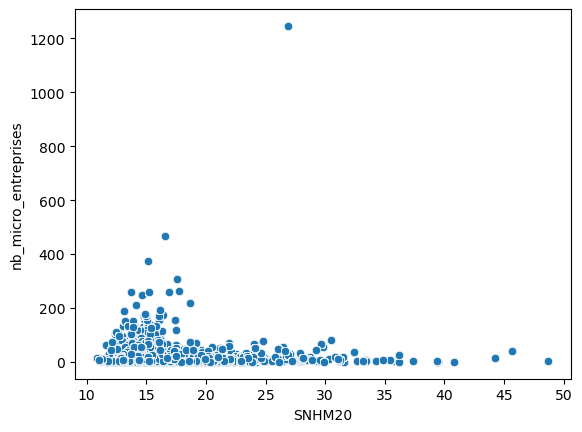

In [25]:
# Plot a scatter plot to visualize the relationship between median salary (SNHM20) 
# and the number of small enterprises (nb_micro_entreprises)

sns.scatterplot(x='SNHM20', y='nb_micro_entreprises', data = df_merge3);

##### Section 2.1.2 Test de Spearman entre le salaire médian et le nombre d'entreprises de petite taille <a class="anchor" id="section_2_1_2"></a>

**Hypothèses :**

- H0 : Il n'y a pas de corrélation entre les variables.
- H1 : Il y a une corrélation entre les variables.

Si la valeur p > α* : il n'y a pas de corrélation entre le salaire médian et le nombre d'entreprises de petite taille.
<p>*Ce coefficient α montre l'intensité de la corrélation.</p>

In [26]:
from scipy import stats

x = df_merge3['SNHM20']
y = df_merge3['nb_micro_entreprises']

# Computing the Spearman correlation coefficient

spearman_corr, spearman_p_value = stats.spearmanr(x, y)

print('Spearman correlation coefficient:', spearman_corr)
print('p-value:', spearman_p_value)

Spearman correlation coefficient: -0.0549034036500151
p-value: 0.0


**Conclusions :**

Après avoir calculé le coefficient de corrélation de Spearman entre le salaire médian et le nombre d'entreprises de petite taille, nous avons obtenu un coefficient de -0.0555 avec une p de 0.0.

Cela confirme une corrélation négative faible entre ces deux variables. Comparativement, avec le test de corrélation de Pearson, nous avions obtenu un coefficient de corrélation de -0.00918, également indiquant une corrélation négative, mais moins forte.

La valeur p < 0.05, nous rejetons H0 et acceptons H1. 
Il existe une corrélation entre le salaire médian et le nombre d'entreprises de grande taille.

##### Section 2.1.3 Test ANOVA <a class="anchor" id="section_2_1_3"></a>

Test ANOVA entre les régions (REG_nom) et le salaire médian (SNHM20)

**Hypothesis :** 

- H0 : Aucune influence significative entre les régions et le salaire médian
- H1 : Influence significative entre les régions et le salaire médian

In [27]:
## Test
import statsmodels.api 
result = statsmodels.formula.api.ols('SNHM20 ~ REG_nom', data=df_merge3).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

print("p-value (PR(>F)) < 5%  - we reject H0 and accept H1")

,df,sum_sq,mean_sq,F,PR(>F)
REG_nom,16.0,2.807528e+06,175470.474598,25819.581209,0.0
Residual,1278757.0,8.690462e+06,6.796023,NaN,NaN


p-value (PR(>F)) < 5%  - we reject H0 and accept H1


Il existe une influence significative entre les régions et le salaire médian.

#### Section 2.2. Représentations graphiques <a class="anchor" id="section_2_2"></a>

##### Section 2.2.1 Représentations graphiques des salaires médians par région <a class="anchor" id="section_2_2_1"></a>

<Figure size 2000x2000 with 0 Axes>

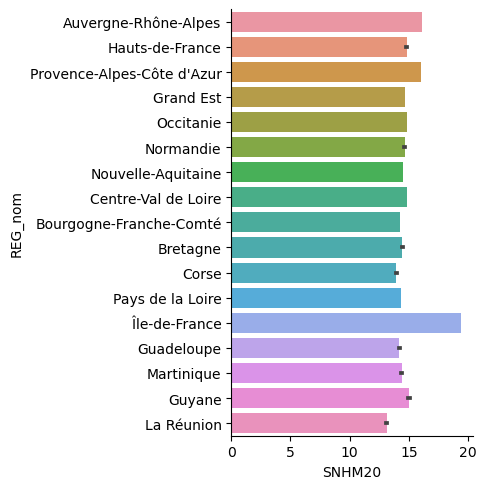

In [28]:
#Barplot
plt.figure(figsize=(20, 20))
sns.catplot(x = 'SNHM20', y = 'REG_nom', kind = 'bar', data = df_merge3);
plt.show();

**Conclusion :** 
- La région où le salaire médian dans l'industrie est le plus élevé est l'Ile de France.
- La région où le salaire médian dans l'industrie est le plus faible est La Réunion.
- On constate une relative égalité dans les autres regions. 

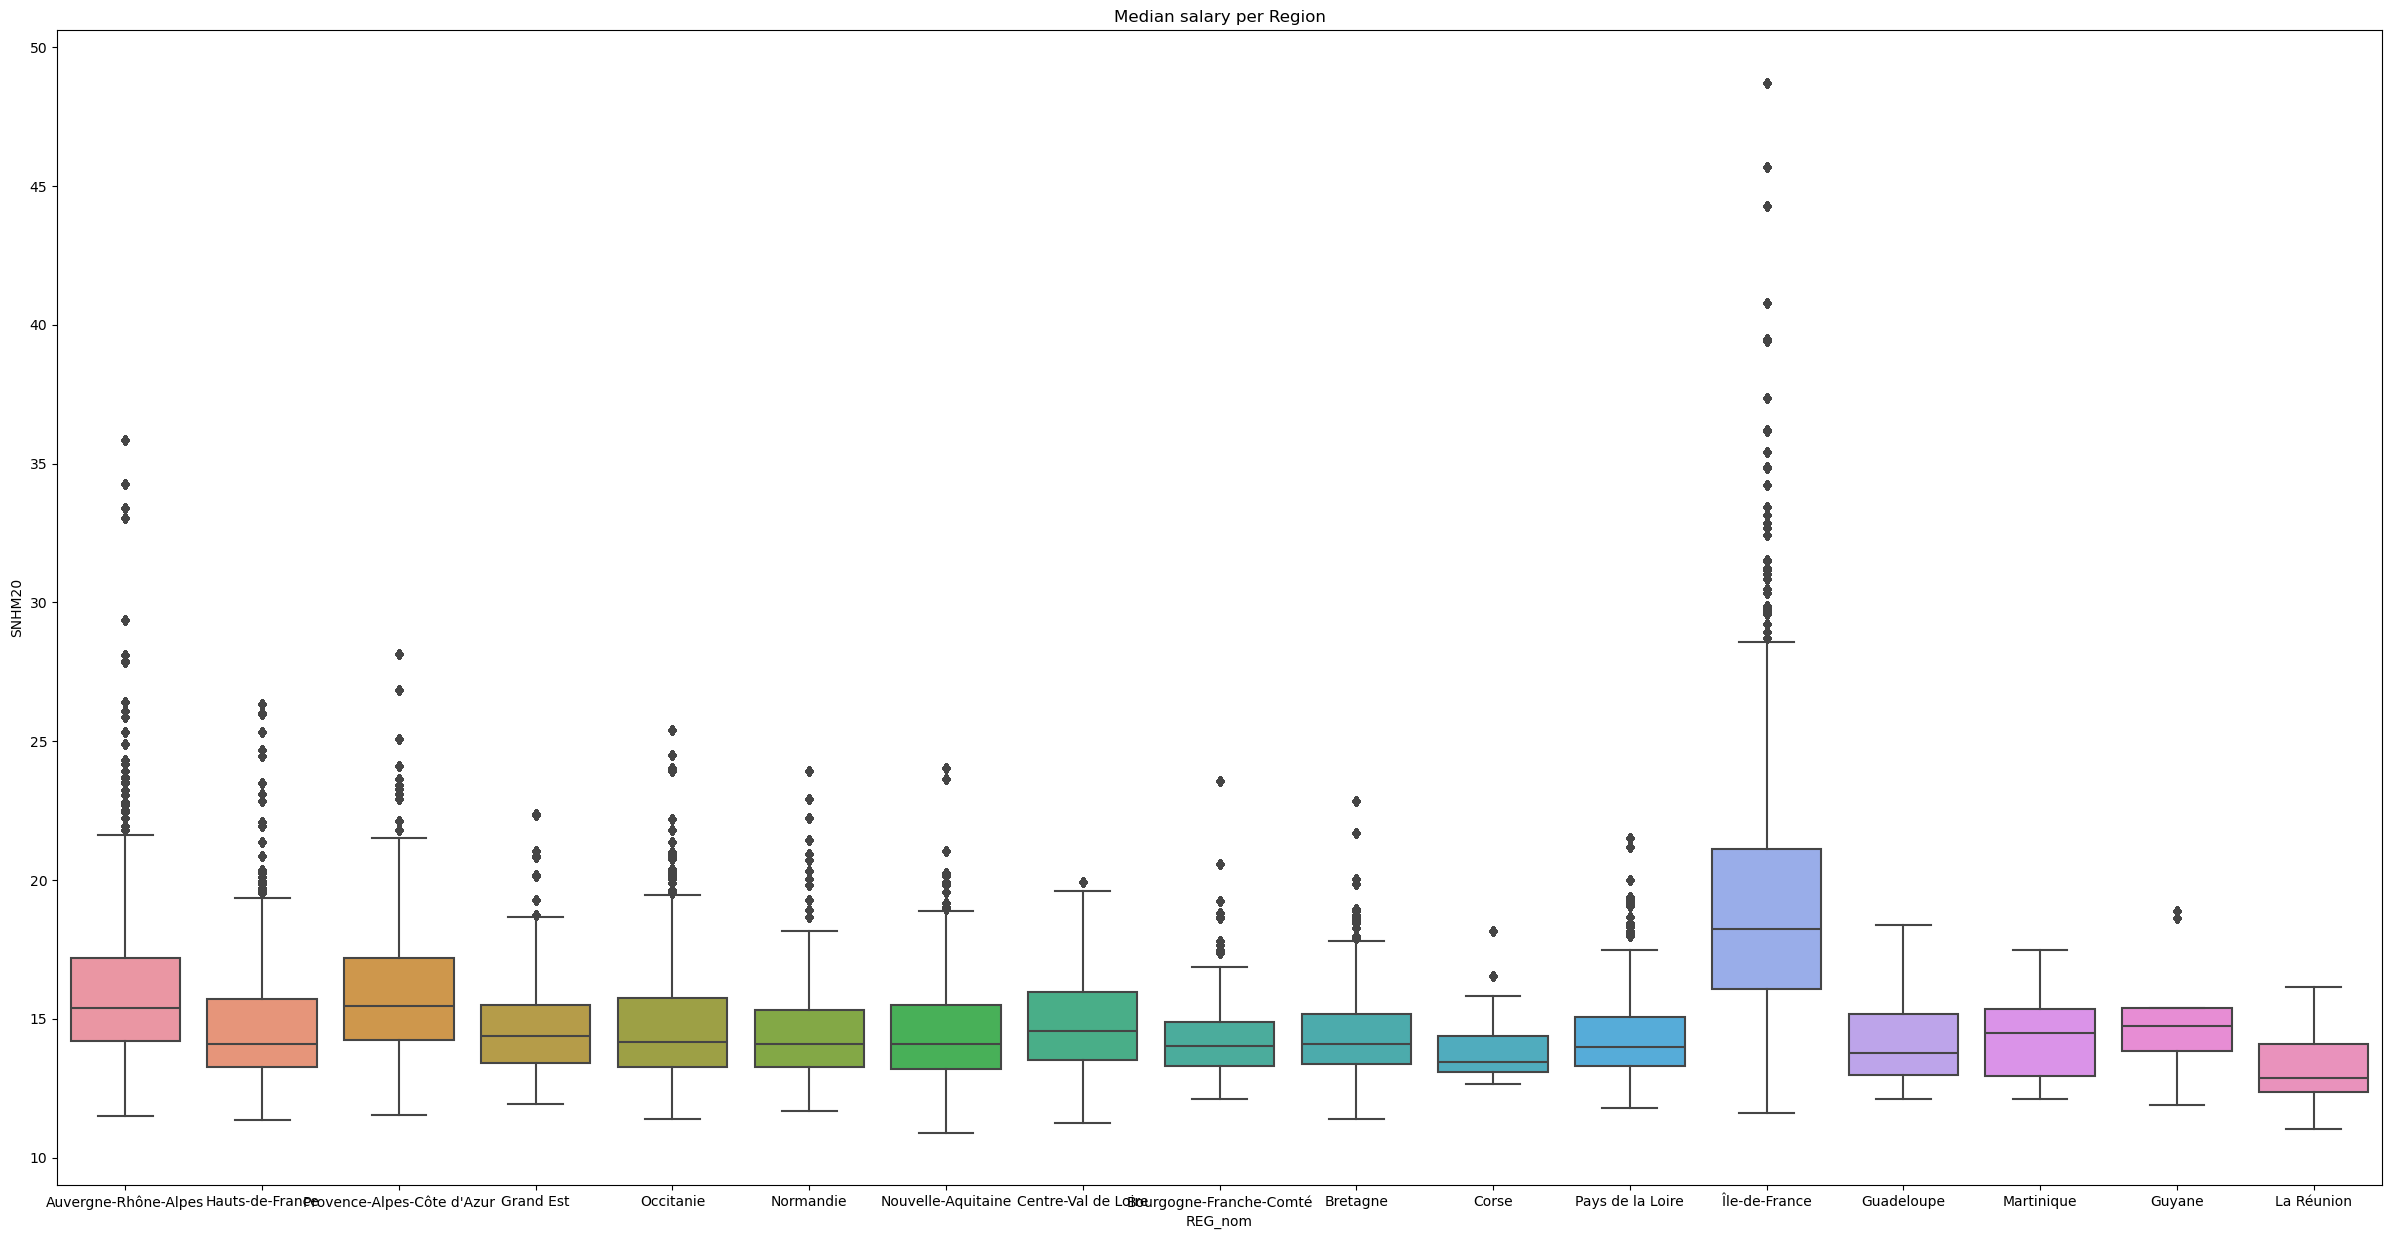

In [29]:
#Box plot (visibilité des valeurs aberrantes)
plt.figure(figsize=(30, 15));
sns.boxplot(x = 'REG_nom', y ='SNHM20', data = df_merge3)
plt.title('Median salary per Region')
plt.show()

**Conclusions :**

Dispersion : plus la boîte est longue, plus la dispersion des salaires moyens est grande dans une région, c'est le cas de l'Ile de France. (A l'inverse de la Bourgogne Franche-Comté, de la Corse ou de la Guyane).

Valeurs aberrantes : Les points situés à l'extérieur des « moustaches » du boxplot représentent les valeurs aberrantes, c'est-à-dire les salaires moyens qui sont considérablement plus élevés ou plus bas que la norme dans une région. 

C'est le cas pour un grand nombre de régions dont l'IDF qui détient la palme. La conclusion est inverse pour les DOM-TOM, la Corse et le Centre Val de Loire.

##### Section 2.2.2 Représentations graphiques de la distribution des salaires des femmes et des hommes de plus de 50 ans dans l'industrie en France <a class="anchor" id="section_2_2_2"></a>

Text(0.5, 0, 'Salaire')

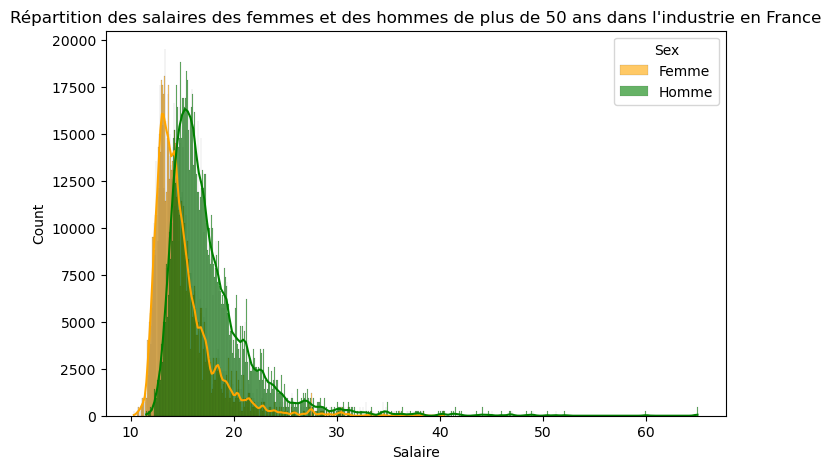

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the distribution of women's salaries
sns.histplot(df_merge3['SNHMF5020'], kde=True, color='orange', label='Femme',alpha=0.6, ax=ax)

# Plot the distribution of men's salaries on the same Axes object
sns.histplot(df_merge3['SNHM5020'], kde=True, color='green', label='Homme', alpha=0.6, ax=ax)

plt.legend(title='Sex')
plt.title('Répartition des salaires des femmes et des hommes de plus de 50 ans dans l\'industrie en France')

plt.xlabel('Salaire')

**Conclusions :**
<p>La courbe KDE est inclinée vers la gauche, cela peut indiquer une concentration autour des salaires les plus bas. La concentration est plus importante aux alentours des 12€/h.</p>
<p> La courbe KDE est inclinée vers la gauche, cela peut indiquer une concentration autour des salaires les plus bas. La concentration est plus importante aux alentours des 15€/h. Les salaires même faibles sont supérieurs chez les hommes que chez les femmes.</p>

##### Section 2.2.3 Représentations graphiques de la distribution des salaires des femmes et des hommes de 18 à 25 ans dans l'industrie en France  <a class="anchor" id="section_2_2_3"></a> 


Text(0.5, 0, 'Salaire')

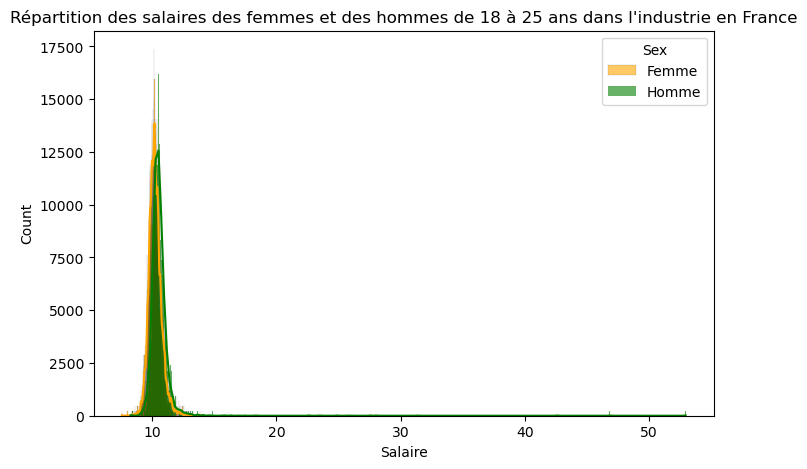

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the distribution of women's salaries
sns.histplot(df_merge3['SNHMF1820'], kde=True, color='orange', label='Femme',alpha=0.6, ax=ax)

# Plot the distribution of men's salaries on the same Axes object
sns.histplot(df_merge3['SNHM1820'], kde=True, color='green', label='Homme', alpha=0.6, ax=ax)

plt.legend(title='Sex')
plt.title('Répartition des salaires des femmes et des hommes de 18 à 25 ans dans l\'industrie en France')

plt.xlabel('Salaire')

**Conclusions :**
<p>La concentration des salaires est plus importante aux alentours des 12€/h pour les hommes et les femmes de 18 à 25 ans. 
Les salaires même faibles sont légérement supérieurs chez les hommes que chez les femmes.
Contrairement à leurs aînés les jeunes dans l'industrie connaissent moins d'écarts salariaux en début de carrières.</p>

##### Section 2.2.4 Représentation graphique des salaires des femmes de plus de 50 ans par région <a class="anchor" id="section_2_2_4"></a>

<Figure size 3000x1000 with 0 Axes>

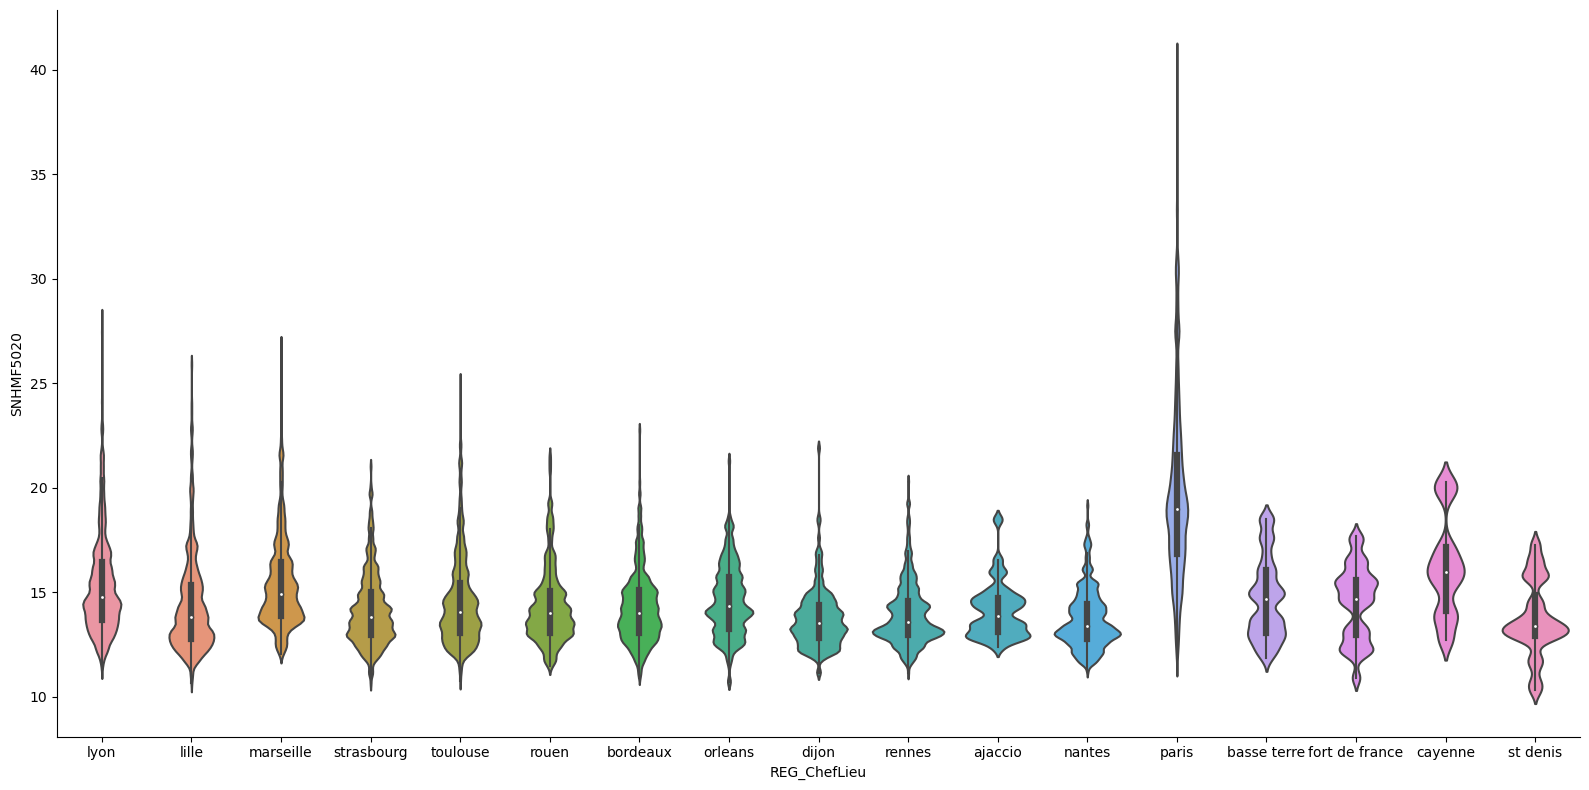

In [32]:
plt.figure(figsize=(30, 10));
sns.catplot(x = "REG_ChefLieu", y = "SNHMF5020", data = df_merge3, kind = "violin", 
            split = True, height=8, aspect=2, fontsize=10, labelpad=20, rotation=90);
plt.show();

**Conclusions :**

Disparité : si un violon est plus large et plus plat que les autres, cela peut indiquer une plus grande disparité des salaires dans ce chef-lieu. 
Le cas de l'Ile de France est l'antinomie de cette conjecture (un violon plus étroit et plus élevé indique une concentration plus élevée de salaires autour d'une valeur moyenne). Rennes et Nantes sont des régions où les salaires sont plus disparates vs. l'Ile de France.

Médiane : la ligne médiane à l'intérieur du violon représente la médiane des salaires. 
C'est la valeur centrale de la distribution des salaires pour ce groupe spécifique de femmes dans ce chef-lieu.

Paris et Marseille ont des valeurs médianes plus élevées que les autres villes <=> les salaires des femmes sont en moyenne plus élevées dans ces villes a contrario de Lille ou Saint Denis de la Réunion par exemple


##### Section 2.2.5 Représentation graphique des salaires des hommes de plus de 50 ans par région <a class="anchor" id="section_2_2_5"></a>

<Figure size 3000x1000 with 0 Axes>

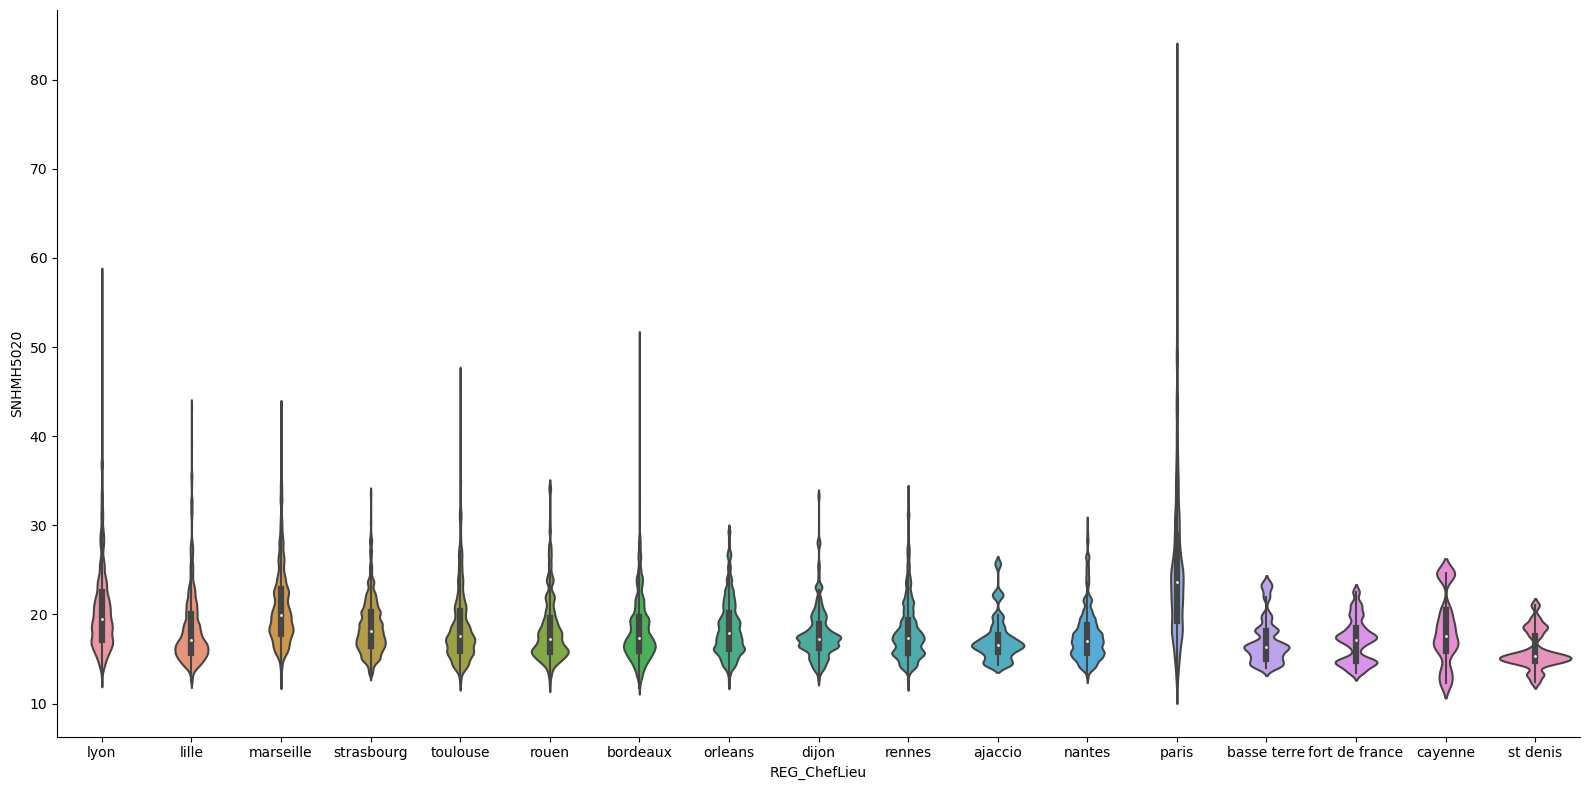

In [33]:
plt.figure(figsize=(30, 10));
sns.catplot(x = "REG_ChefLieu", y = "SNHMH5020", data = df_merge3, kind = "violin", 
            split = True,height=8, aspect=2, fontsize=10, labelpad=20, rotation=90);
plt.show();

**Conclusions :**
<p>Les interprétations sont sensiblement les mêmes que pour l'analyse des salaires des femmes de plus de 50 ans.
La différence notable est le niveau de salaire nettement plus élevé chez les hommes que chez les femmes, c'est très visible en terme de concentration (surtout en IDF)</p>

##### Section 2.2.6 Corrélation entre les tailles d'entreprise et les salaires moyens (heatmap) <a class="anchor" id="section_2_2_6"></a>

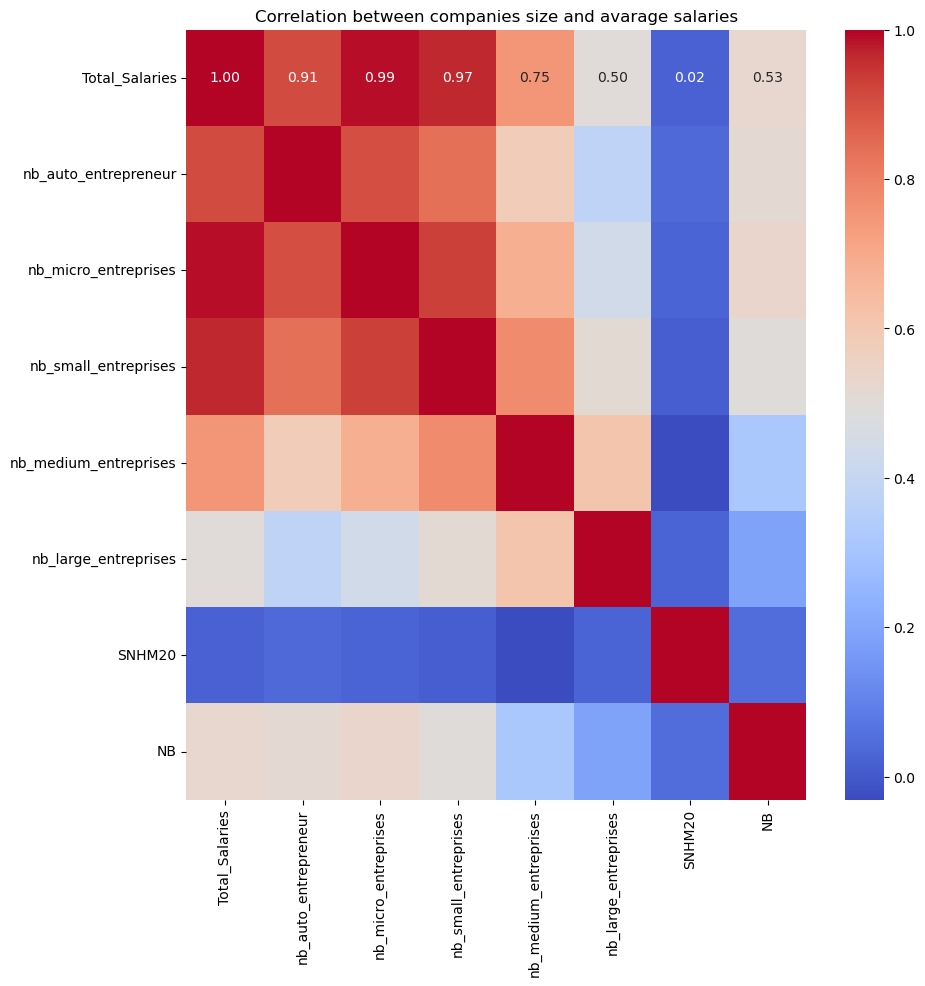

In [34]:
# Correlation between companies size and avarage salaries
selected_columns = ['Total_Salaries', 'nb_auto_entrepreneur','nb_micro_entreprises', 'nb_small_entreprises', 
                    'nb_medium_entreprises', 'nb_large_entreprises', 'SNHM20', 'NB']
selected_df = df_merge3[selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between companies size and avarage salaries')
plt.show()

**Conclusions :** On note assez peu de corrélations entre les salaires médians et les tailles d'entreprises.

##### Section 2.2.7 Représentation graphique du nombre d'employés par région <a class="anchor" id="section_2_2_7"></a>

In [35]:
# Aggregate the data by REG_nom and sum the number of enterprises
reg_name_enterprises = df_merge3.groupby('REG_nom')['Total_Salaries'].sum().reset_index()

# Sort DataFrame by the 'Total_Salaries' column
reg_name_enterprises_sorted = reg_name_enterprises.sort_values(by='Total_Salaries', ascending=False)

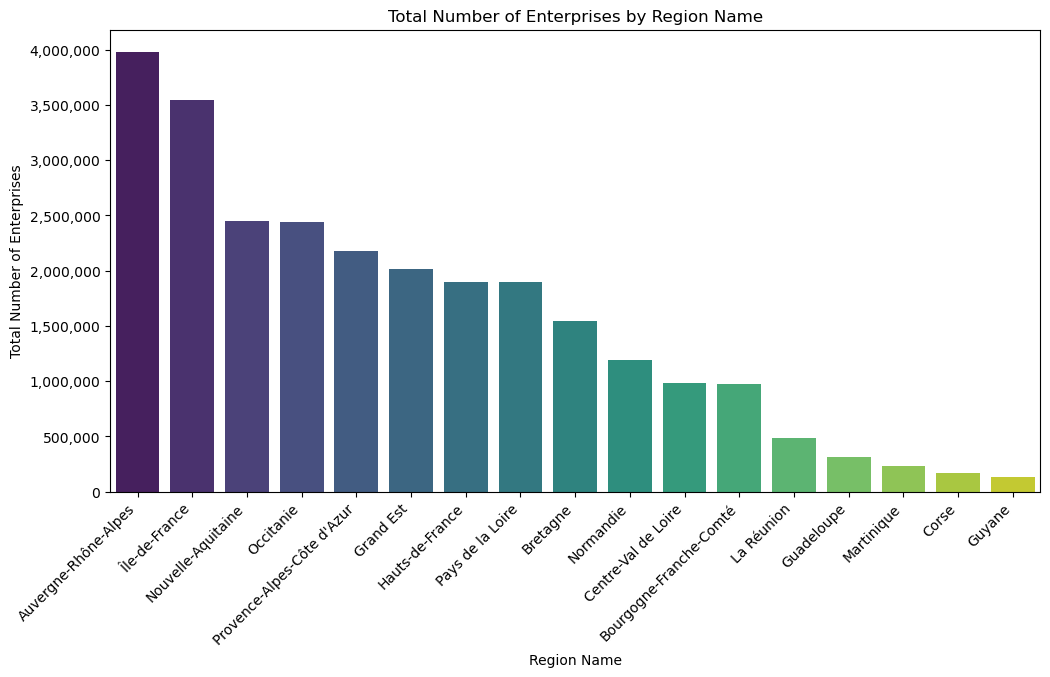

In [36]:
# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='REG_nom', y='Total_Salaries', data=reg_name_enterprises_sorted, palette='viridis' )
plt.title('Total Number of Enterprises by Region Name')
plt.xlabel('Region Name')
plt.ylabel('Total Number of Enterprises')
plt.xticks(rotation=45, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show();


**Conclusions :**
La région qui compte le plus grand nombre de salariés dans l'industrie (près de 4 millions) est Auvergne-Rhône-Alpes.

##### Section 2.2.8 Représentation graphique du type d'entreprises par Chef lieu des régions françaises <a class="anchor" id="section_2_2_8"></a>

In [37]:
# Aggregate the data by regional capital and sum the counts of each type of enterprise
region_enterprise_counts = df_merge3.groupby('REG_ChefLieu')[['nb_auto_entrepreneur','nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises', 'nb_large_entreprises']].sum().reset_index()

region_enterprise_counts_sorted = region_enterprise_counts.sort_values(by = 'nb_micro_entreprises', ascending = False)

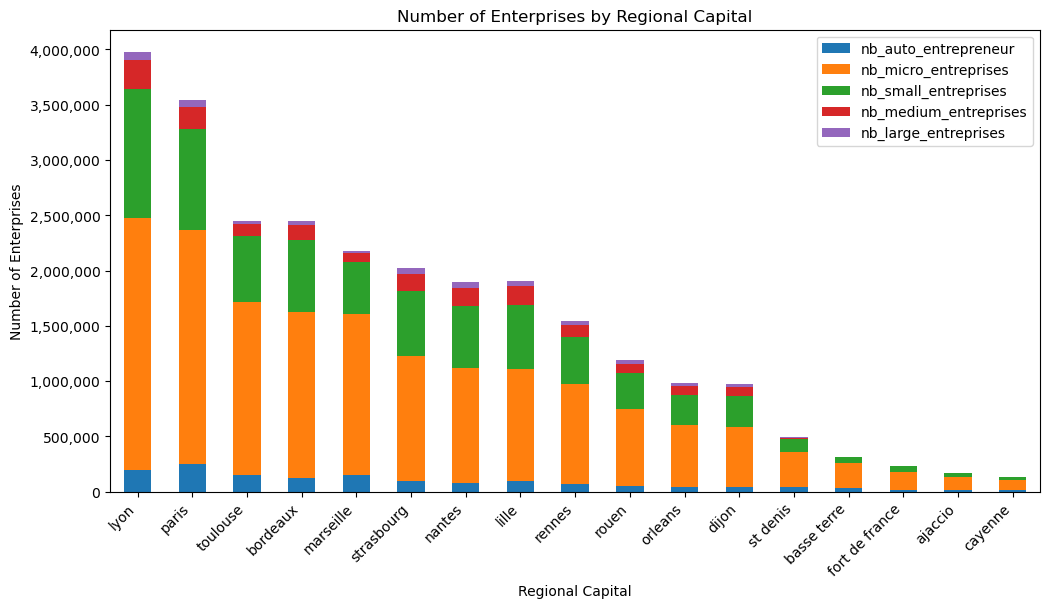

In [38]:
region_enterprise_counts_sorted.plot(x='REG_ChefLieu', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Enterprises by Regional Capital')
plt.xlabel('Regional Capital')
plt.ylabel('Number of Enterprises')
plt.xticks(rotation=45, ha='right')

# Customize the y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

**Conclusions :**
La représentation des micro-entreprises dans l'industrie est majoritaire dans toutes les grandes villes françaises. Lyon est N°1 comme évoqué dans la représentation graphique précédente.

##### Section 2.2.9 Corrélation entre les la distance des Grandes Villes et les salaires moyens (heatmap) <a class="anchor" id="section_2_2_9"></a>

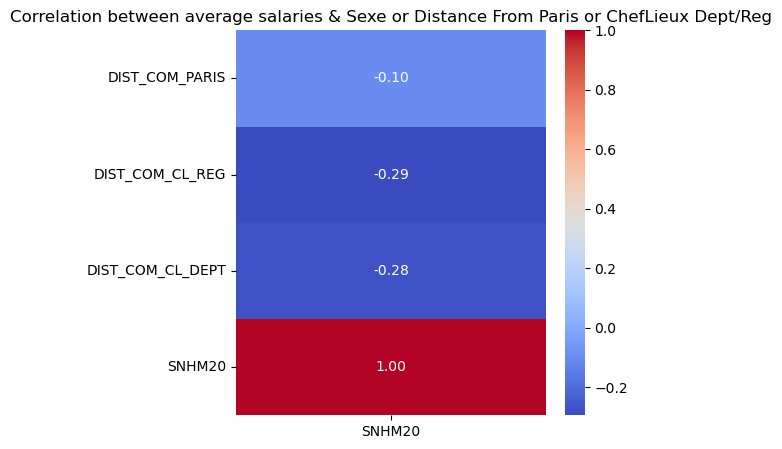

In [39]:
# Correlation between Average Salaries & distances from Paris/ChefLieux
selected_columns = ['DIST_COM_PARIS','DIST_COM_CL_REG','DIST_COM_CL_DEPT','SNHM20']
selected_df = df_merge3[selected_columns]

correlation_matrix = selected_df.corr()[["SNHM20"]]

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between average salaries & Sexe or Distance From Paris or ChefLieux Dept/Reg')
plt.show()

**Conclusions :** Etonnamment on ne voit pas d'impact de la distance des grandes villes sur le salaire moyen

##### Section 2.2.10 Corrélation entre la distance du Chef Lieu de Région et le mode de cohabitation (displot) <a class="anchor" id="section_2_2_10"></a>

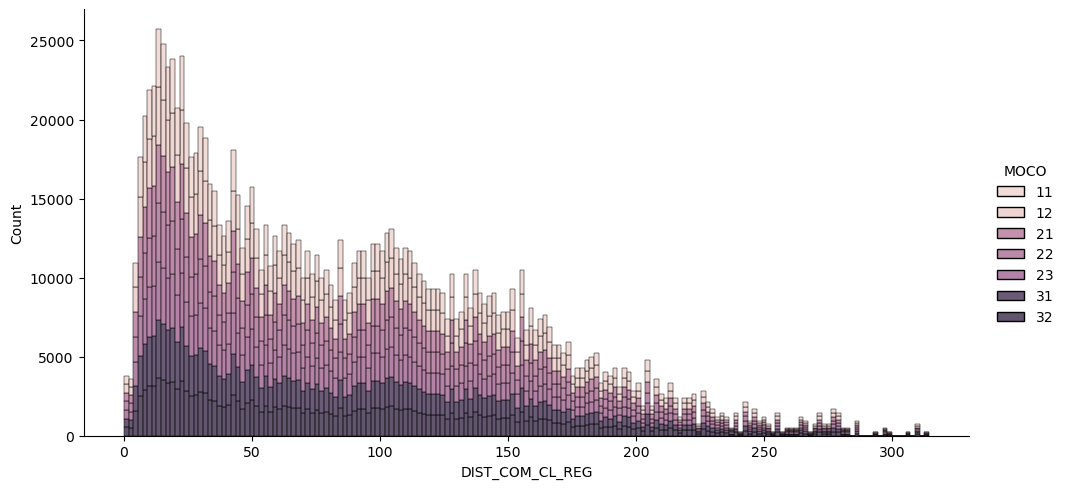

In [40]:
#Analysis of influence between Distance From ChefLieu_REG and Cohabitation Mode

sns.displot(data=df_merge3, x="DIST_COM_CL_REG", hue="MOCO", multiple="stack", height=5, aspect=2)


**Conclusions :** La distance par rapport au chef lieu de région ne semble pas avoir de réelle influence sur le mode de cohabitation.

### Chapitre 3. Nettoyage de données et Pre-processing  <a class="anchor" id="chapter3"></a>

#### Section 3.1. Problématique & proposition de résolution <a class="anchor" id="section_3_1"></a>


#### Section 3.1.1 Problématique partagée <a class="anchor" id="section_3_1_1"></a>
D'après ces premières analyses, il est nous est apparu clé **d'enrichir notre dataset** afin de travailler sur 2 axes principaux :
- Comment varie le nombre d’emplois (entreprises) en fonction de la région. 
- Comment les disparités salariales varient-elles selon le genre et l’âge dans ces différentes régions et d'en comprendre les raisons ?

Plus précisément, notre objectif est de comprendre :
- La différence de salaire net moyen horaire entre hommes et femmes, particulièrement parmi les professions de cadres (exécutives).
- Les écarts de salaire liés à l’âge entre hommes et femmes, en comparant les tranches d’âge les plus âgées avec les plus jeunes.
- L’écart salarial global entre hommes et femmes.
- Les disparités salariales entre hommes et femmes sur des tranches groupes d’âge spécifiques (18-25 ans et plus de 50 ans).

#### Section 3.1.2 Proposition de Résolution <a class="anchor" id="section_3_1_2"></a>
- Calcul des disparités salariales
- Agrégation des données par Régions/départements/communes
- Normalisation des données avant clustering (Application d’une normalisation standard sur les caractéristiques combinées pour permettre un clustering équilibré via l’algorithme KMeans)
- Trouver le nombre optimal de clusters grâce à la méthode de coude
- Classification des régions en clusters basés sur les métriques combinées de salaires et de disparités, afin d’identifier des modèles ou des groupes de régions présentant des caractéristiques similaires.
- Visualisation géographique des Clusters

#### Section 3.2 Enrichissement Dataset <a class="anchor" id="section_3_2"></a>

In [41]:
#  Allow to plot all columns of a data set
pd.set_option('display.max_columns', None)

## Read long strings in pandas dataframe
pd.options.display.max_colwidth = 1000

# Allow to display maximum 100 rows of a data set
pd.set_option('display.max_rows', 100)

In [42]:
# read a new datasets with dimploma information that was found on INSEE, .csv from Google Drive
file_id_diploma = '11-KEM4rJ2PqxsTn-BxW1pOfJobx6jjuv' # .csv file

# Construct the direct download link
download_link_diploma = f'https://drive.google.com/uc?export=download&id={file_id_diploma}'

df_diploma=pd.read_csv(download_link_diploma, sep=';')     # OK  : from .csv file in google drive
df_diploma.head()

,CODGEO,P20_HNSCOL15P_DIPLMIN,P20_HNSCOL15P_SUP5,P20_FNSCOL15P_DIPLMIN,P20_FNSCOL15P_SUP5
0,1001,40.946249,18.910057,52.629368,19.796264
1,1002,10.299953,10.697908,7.436433,13.236778
2,1004,855.298380,337.430793,1288.509677,394.687094
3,1005,108.000000,49.000000,123.000000,38.000000
4,1006,10.903509,2.973684,8.921053,2.973684


In [43]:
# Remplir les valeurs de CODGEO avec des zéros à gauche et renommer la colonne
df_diploma['CODGEO'] = df_diploma['CODGEO'].astype(str).str.zfill(5)

In [44]:
display(df_diploma.head())

,CODGEO,P20_HNSCOL15P_DIPLMIN,P20_HNSCOL15P_SUP5,P20_FNSCOL15P_DIPLMIN,P20_FNSCOL15P_SUP5
0,01001,40.946249,18.910057,52.629368,19.796264
1,01002,10.299953,10.697908,7.436433,13.236778
2,01004,855.298380,337.430793,1288.509677,394.687094
3,01005,108.000000,49.000000,123.000000,38.000000
4,01006,10.903509,2.973684,8.921053,2.973684


In [45]:
# Supprimer les chiffres après la virgule
#df_diploma['P20_HNSCOL15P_DIPLMIN'] = df_diploma['P20_HNSCOL15P_DIPLMIN'].astype(int)
#df_diploma['P20_HNSCOL15P_SUP5'] = df_diploma['P20_HNSCOL15P_SUP5'].astype(int)
#df_diploma['P20_FNSCOL15P_DIPLMIN'] = df_diploma['P20_FNSCOL15P_DIPLMIN'].astype(int)
#df_diploma['P20_FNSCOL15P_SUP5'] = df_diploma['P20_FNSCOL15P_SUP5'].astype(int)


df_diploma = df_diploma.rename(columns={
    'P20_HNSCOL15P_DIPLMIN': 'men_over_15_no_diploma',
    'P20_HNSCOL15P_SUP5': 'men_over_15_bac_plus_5_gratuated',
    'P20_FNSCOL15P_DIPLMIN': 'women_over_15_no_diploma',
    'P20_FNSCOL15P_SUP5': 'women_over_15_bac_plus_5_gratuated'
})

In [46]:
display(df_diploma.head())

,CODGEO,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,01001,40.946249,18.910057,52.629368,19.796264
1,01002,10.299953,10.697908,7.436433,13.236778
2,01004,855.298380,337.430793,1288.509677,394.687094
3,01005,108.000000,49.000000,123.000000,38.000000
4,01006,10.903509,2.973684,8.921053,2.973684


In [47]:
# Merge the 'df_merge3' DataFrame with the 'df_diploma' DataFrame based on the 'CODGEO' column
df_merge4=df_merge3.merge(df_diploma,left_on='CODGEO',right_on='CODGEO')
display(df_merge4.head())

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_nom,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_nom,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,Capitale,Capitale_latitude,Capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,SNHMFO20,SNHMH20,SNHMHC20,SNHMHP20,SNHMHE20,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020,NIVGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,1,416,855.29838,337.430793,1288.509677,394.687094
1,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,0,2,469,855.29838,337.430793,1288.509677,394.687094
2,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,1,331,855.29838,337.430793,1288.509677,394.687094
3,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,5,2,276,855.29838,337.430793,1288.509677,394.687094
4,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654,COM,Ambérieu-en-Bugey,11,10,1,313,855.29838,337.430793,1288.509677,394.687094


In [48]:
df_merge4.columns

Index(['CODGEO', 'Total_Salaries', 'nb_auto_entrepreneur',
       'nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises',
       'nb_large_entreprises', 'COM_code_insee', 'COM_nom', 'COM_latitude',
       'COM_longitude', 'DEPT', 'DEPT_code', 'DEPT_nom',
       'DEPT_ChefLieu_Code_insee', 'DEPT_ChefLieu', 'DEPT_ChefLieu_latitude',
       'DEPT_ChefLieu_longitude', 'REG', 'REG_code', 'REG_nom',
       'REG_ChefLieu_Code_insee', 'REG_ChefLieu', 'REG_ChefLieu_latitude',
       'REG_ChefLieu_longitude', 'CAP', 'Capitale', 'Capitale_latitude',
       'Capitale_longitude', 'DIST', 'DIST_COM_CL_DEPT', 'DIST_COM_CL_REG',
       'DIST_COM_PARIS', 'SNHM20', 'SNHMC20', 'SNHMP20', 'SNHME20', 'SNHMO20',
       'SNHMF20', 'SNHMFC20', 'SNHMFP20', 'SNHMFE20', 'SNHMFO20', 'SNHMH20',
       'SNHMHC20', 'SNHMHP20', 'SNHMHE20', 'SNHMHO20', 'SNHM1820', 'SNHM2620',
       'SNHM5020', 'SNHMF1820', 'SNHMF2620', 'SNHMF5020', 'SNHMH1820',
       'SNHMH2620', 'SNHMH5020', 'NIVGEO', 'LIBGEO', 'MO

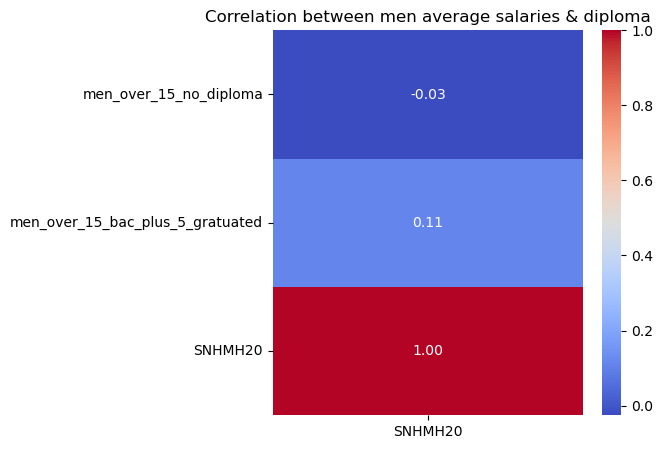

In [49]:
# Correlation entre le salaire moyen des hommes & diplômes
selected_columns = ['men_over_15_no_diploma','men_over_15_bac_plus_5_gratuated','SNHMH20']
selected_df = df_merge4[selected_columns]

correlation_matrix = selected_df.corr()[["SNHMH20"]]

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between men average salaries & diploma')
plt.show()

**Pour les hommes de plus de 15 ans sans diplômes**
<p>Ils ont un indice de corrélation de -0,08.</p>
<p>Cela indique une corrélation très faible et presque négligeable entre le nombre d'hommes de plus de 15 ans sans diplômes et les salaires moyens des hommes. 
La valeur négative indique une tendance inverse légère, mais la valeur est proche de zéro, ce qui suggère qu'il n'y a pas de corrélation linéaire significative entre ces variables.
</p>

**Pour les hommes de plus de 15 ans avec un Bac +5** 
<p>Ils ont un indice de corrélation de +0,22.</p>
<p>Cela indique une corrélation positive modérée entre le nombre d'hommes de plus de 15 ans avec un Bac +5 
et les salaires moyens des hommes. 
La valeur positive indique que les deux variables ont tendance à augmenter ensemble, mais la corrélation n'est pas très forte. </p>

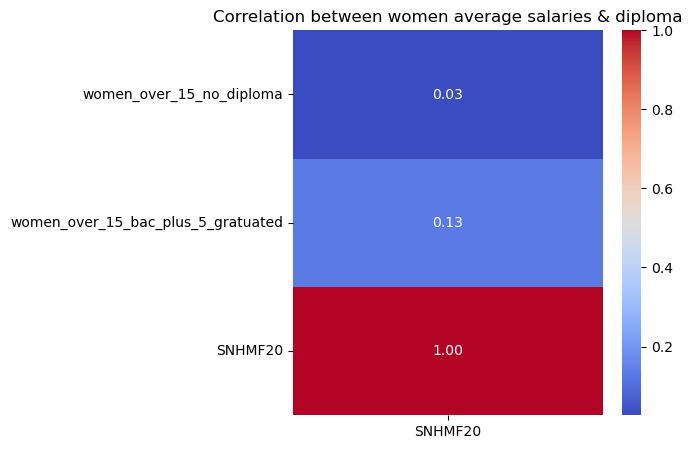

In [50]:
# Correlation entre le salaire moyen des femmes & diplômes
selected_columns = ['women_over_15_no_diploma','women_over_15_bac_plus_5_gratuated','SNHMF20']
selected_df = df_merge4[selected_columns]

correlation_matrix = selected_df.corr()[["SNHMF20"]]

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between women average salaries & diploma')
plt.show()

Le constat est identique ou presque pour les femmes

In [51]:
df_final_merge = df_merge4.copy()

# Drop column 'NIVGEO' because it has only one unique value, and 'LIBGEO' - dublicate of com_name
df_final_merge = df_final_merge.drop(columns=['NIVGEO', 'LIBGEO'])

In [52]:
df_final_merge.columns

Index(['CODGEO', 'Total_Salaries', 'nb_auto_entrepreneur',
       'nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises',
       'nb_large_entreprises', 'COM_code_insee', 'COM_nom', 'COM_latitude',
       'COM_longitude', 'DEPT', 'DEPT_code', 'DEPT_nom',
       'DEPT_ChefLieu_Code_insee', 'DEPT_ChefLieu', 'DEPT_ChefLieu_latitude',
       'DEPT_ChefLieu_longitude', 'REG', 'REG_code', 'REG_nom',
       'REG_ChefLieu_Code_insee', 'REG_ChefLieu', 'REG_ChefLieu_latitude',
       'REG_ChefLieu_longitude', 'CAP', 'Capitale', 'Capitale_latitude',
       'Capitale_longitude', 'DIST', 'DIST_COM_CL_DEPT', 'DIST_COM_CL_REG',
       'DIST_COM_PARIS', 'SNHM20', 'SNHMC20', 'SNHMP20', 'SNHME20', 'SNHMO20',
       'SNHMF20', 'SNHMFC20', 'SNHMFP20', 'SNHMFE20', 'SNHMFO20', 'SNHMH20',
       'SNHMHC20', 'SNHMHP20', 'SNHMHE20', 'SNHMHO20', 'SNHM1820', 'SNHM2620',
       'SNHM5020', 'SNHMF1820', 'SNHMF2620', 'SNHMF5020', 'SNHMH1820',
       'SNHMH2620', 'SNHMH5020', 'MOCO', 'AGEQ80_17', 'S

In [53]:
# Renaming the columns
new_column_names = {
    'SNHM20': 'mean_net_salary_hour_overall',
    'SNHMC20': 'mean_net_salary_hour_executives',
    'SNHMP20': 'mean_net_salary_hour_avg_executive',
    'SNHME20': 'mean_net_salary_hour_employee',
    'SNHMO20': 'mean_net_salary_hour_worker',
    'SNHMF20': 'mean_net_salary_hour_female',
    'SNHMFC20': 'mean_net_salary_hour_female_executives',
    'SNHMFP20': 'mean_net_salary_hour_avg_female_executive',
    'SNHMFE20': 'mean_net_salary_hour_female_employee',
    'SNHMFO20': 'mean_net_salary_hour_female_worker',
    'SNHMH20': 'mean_net_salary_hour_male',
    'SNHMHC20': 'mean_net_salary_hour_male_executives',
    'SNHMHP20': 'mean_net_salary_hour_avg_male_executive',
    'SNHMHE20': 'mean_net_salary_hour_male_employee',
    'SNHMHO20': 'mean_net_salary_hour_male_worker',
    'SNHM1820': 'mean_net_salary_hour_18_25',
    'SNHM2620': 'mean_net_salary_hour_26_50',
    'SNHM5020': 'mean_net_salary_hour_over_50',
    'SNHMF1820': 'mean_net_salary_hour_female_18_25',
    'SNHMF2620': 'mean_net_salary_hour_female_26_50',
    'SNHMF5020': 'mean_net_salary_hour_female_over_50',
    'SNHMH1820': 'mean_net_salary_hour_male_18_25',
    'SNHMH2620': 'mean_net_salary_hour_male_26_50',
    'SNHMH5020': 'mean_net_salary_hour_male_over_50',
    'DEPT_nom': 'DEPT_name',
    'COM_nom' : 'COM_name', 
    'Capitale' : 'capital', 
    'Capitale_latitude' : 'capital_latitude',
    'Capitale_longitude':'capitale_longitude',
    'SEXE' : 'sex'
}

df_final_merge = df_final_merge.rename(columns=new_column_names)

In [54]:
summary(df_final_merge)

,type_info,%_missing_values,nb_unique_values,nb_zero_values,%_zero_values,list_unique_values,mean_or_mode,flag
CODGEO,object,0.0,5373,0,0.0,Too many values...,01004,Nothing to report
Total_Salaries,int64,0.0,197,6664,1.0,Too many values...,20.677275,Nothing to report
nb_auto_entrepreneur,int64,0.0,31,683298,53.0,Too many values...,1.145729,Nothing to report
nb_micro_entreprises,int64,0.0,136,19516,2.0,Too many values...,12.289038,Nothing to report
nb_small_entreprises,int64,0.0,80,208012,16.0,Too many values...,5.562256,Nothing to report
nb_medium_entreprises,int64,0.0,29,669256,52.0,Too many values...,1.304113,Nothing to report
nb_large_entreprises,int64,0.0,15,997934,78.0,Too many values...,0,Nothing to report
COM_code_insee,object,0.0,5373,0,0.0,Too many values...,01004,Nothing to report
COM_name,object,0.0,5325,0,0.0,Too many values...,Sainte-Marie,Nothing to report
COM_latitude,float64,0.0,5373,0,0.0,Too many values...,46.282275,Nothing to report


In [55]:
# Drop columns that will not be used 
df = df_final_merge.drop(columns=['MOCO', 'AGEQ80_17', 'sex', 'NB'])  

# Drop duplicate rows
df = df.drop_duplicates()

df_final_merge2 = df.copy()
df_final_merge2 = df_final_merge2.reset_index(drop=True) 
df_final_merge2.shape

(5373, 61)

#### Section 3.3. Standardisation des variables numerique <a class="anchor" id="section_3_3"></a>

In [56]:
df_final_merge2.columns

Index(['CODGEO', 'Total_Salaries', 'nb_auto_entrepreneur',
       'nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises',
       'nb_large_entreprises', 'COM_code_insee', 'COM_name', 'COM_latitude',
       'COM_longitude', 'DEPT', 'DEPT_code', 'DEPT_name',
       'DEPT_ChefLieu_Code_insee', 'DEPT_ChefLieu', 'DEPT_ChefLieu_latitude',
       'DEPT_ChefLieu_longitude', 'REG', 'REG_code', 'REG_nom',
       'REG_ChefLieu_Code_insee', 'REG_ChefLieu', 'REG_ChefLieu_latitude',
       'REG_ChefLieu_longitude', 'CAP', 'capital', 'capital_latitude',
       'capitale_longitude', 'DIST', 'DIST_COM_CL_DEPT', 'DIST_COM_CL_REG',
       'DIST_COM_PARIS', 'mean_net_salary_hour_overall',
       'mean_net_salary_hour_executives', 'mean_net_salary_hour_avg_executive',
       'mean_net_salary_hour_employee', 'mean_net_salary_hour_worker',
       'mean_net_salary_hour_female', 'mean_net_salary_hour_female_executives',
       'mean_net_salary_hour_avg_female_executive',
       'mean_net_salar

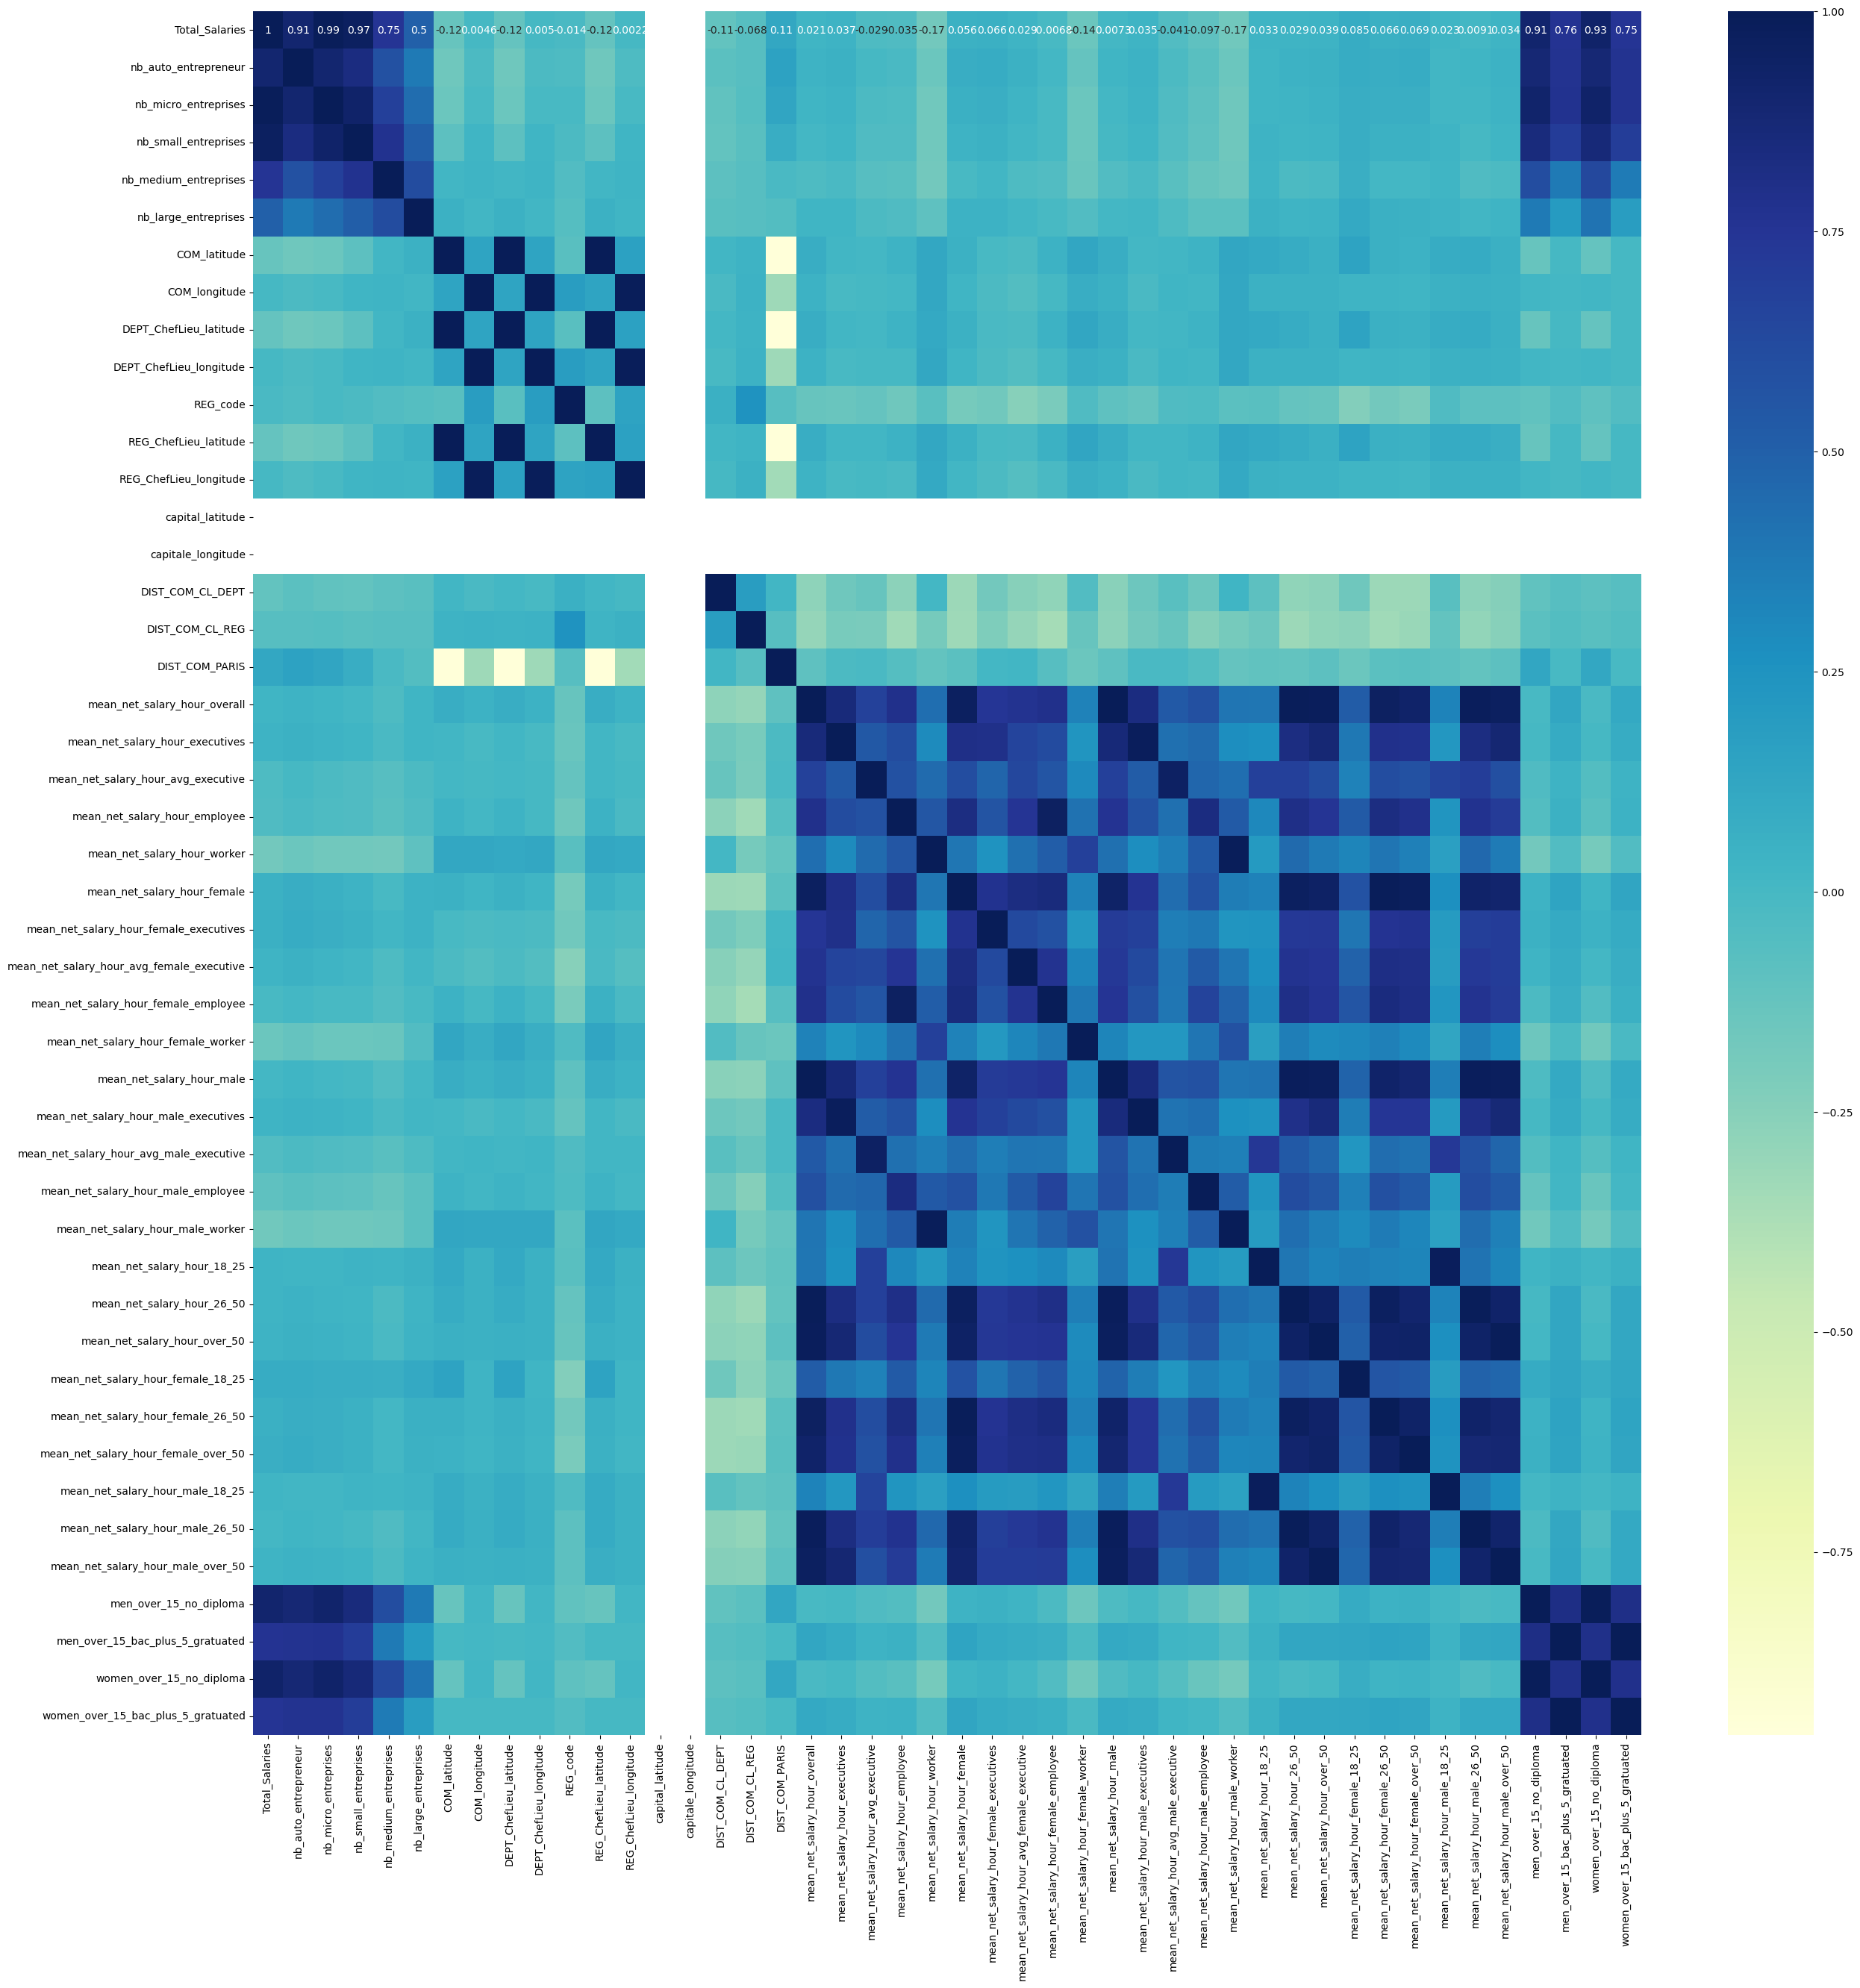

In [57]:
cor = df_final_merge2.corr(numeric_only = True)
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot = True , cmap = 'YlGnBu' );

In [58]:
from sklearn.preprocessing import StandardScaler

features_num_selected = ['Total_Salaries', 'nb_auto_entrepreneur',
       'nb_micro_entreprises', 'nb_small_entreprises', 'nb_medium_entreprises',
       'nb_large_entreprises','DIST_COM_CL_DEPT', 'DIST_COM_CL_REG',
       'DIST_COM_PARIS', 'mean_net_salary_hour_overall',
       'mean_net_salary_hour_executives', 'mean_net_salary_hour_avg_executive',
       'mean_net_salary_hour_employee', 'mean_net_salary_hour_worker',
       'mean_net_salary_hour_female', 'mean_net_salary_hour_female_executives',
       'mean_net_salary_hour_avg_female_executive',
       'mean_net_salary_hour_female_employee',
       'mean_net_salary_hour_female_worker', 'mean_net_salary_hour_male',
       'mean_net_salary_hour_male_executives',
       'mean_net_salary_hour_avg_male_executive',
       'mean_net_salary_hour_male_employee',
       'mean_net_salary_hour_male_worker', 'mean_net_salary_hour_18_25',
       'mean_net_salary_hour_26_50', 'mean_net_salary_hour_over_50',
       'mean_net_salary_hour_female_18_25',
       'mean_net_salary_hour_female_26_50',
       'mean_net_salary_hour_female_over_50',
       'mean_net_salary_hour_male_18_25', 'mean_net_salary_hour_male_26_50',
       'mean_net_salary_hour_male_over_50', 'men_over_15_no_diploma',
       'men_over_15_bac_plus_5_gratuated', 'women_over_15_no_diploma',
       'women_over_15_bac_plus_5_gratuated']

sc = StandardScaler()
df_selected = df_final_merge2[features_num_selected].reset_index(drop=True) 

df_selected_scaled = sc.fit_transform(df_selected)
df_scaled_df = pd.DataFrame(df_selected_scaled, columns = features_num_selected)

df_scaled_df.head()

,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,mean_net_salary_hour_overall,mean_net_salary_hour_executives,mean_net_salary_hour_avg_executive,mean_net_salary_hour_employee,mean_net_salary_hour_worker,mean_net_salary_hour_female,mean_net_salary_hour_female_executives,mean_net_salary_hour_avg_female_executive,mean_net_salary_hour_female_employee,mean_net_salary_hour_female_worker,mean_net_salary_hour_male,mean_net_salary_hour_male_executives,mean_net_salary_hour_avg_male_executive,mean_net_salary_hour_male_employee,mean_net_salary_hour_male_worker,mean_net_salary_hour_18_25,mean_net_salary_hour_26_50,mean_net_salary_hour_over_50,mean_net_salary_hour_female_18_25,mean_net_salary_hour_female_26_50,mean_net_salary_hour_female_over_50,mean_net_salary_hour_male_18_25,mean_net_salary_hour_male_26_50,mean_net_salary_hour_male_over_50,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,0.289389,0.259534,0.063936,0.856787,0.270655,-0.365807,-0.022088,-0.621858,-0.067964,-0.122809,0.022497,0.781723,-0.432466,-0.459604,-0.328480,-0.067272,-0.286770,-0.499498,-0.014044,-0.089136,-0.002296,0.667951,-0.308788,-0.377118,0.252054,-0.000332,-0.094238,0.110590,-0.243351,-0.282274,0.253307,0.038707,-0.058447,0.139582,-0.023634,0.218317,-0.001448
1,-0.203779,-0.348081,-0.085538,-0.323392,-0.507216,-0.365807,-0.258877,-0.598654,-0.072977,-0.040036,-0.216763,0.240436,0.487450,0.506675,0.035367,-0.164764,0.463676,0.788875,0.800653,-0.033521,-0.204162,0.121183,-0.313072,0.611275,-0.029131,0.072128,-0.162560,0.737255,0.125516,-0.204350,-0.184504,0.070440,-0.040511,-0.294319,-0.082379,-0.316687,-0.072750
2,0.735589,-0.044273,0.624462,1.038353,1.437462,-0.365807,0.283294,0.018213,-0.082578,-0.267686,0.805785,0.384297,0.848345,-0.361211,-0.540296,-0.459958,-1.394937,1.075666,0.179897,-0.128980,1.123822,0.581365,0.243664,-0.114639,0.400916,-0.363383,-0.263422,0.118271,-0.708037,-0.371525,0.438197,-0.158627,-0.208436,-0.131886,-0.088136,-0.165031,-0.081930
3,-0.274231,-0.348081,-0.235011,-0.323392,-0.118280,-0.365807,-0.891253,-0.364409,-0.108284,-0.241185,-0.382287,0.338851,0.471352,-0.000417,-0.323962,-0.653984,0.239471,0.025220,-0.575759,-0.215834,-0.200231,0.144696,1.939835,0.163454,-0.067599,-0.169249,-0.292195,-0.387829,-0.227477,-0.453986,-0.006535,-0.162489,-0.205909,-0.274393,-0.085173,-0.284476,-0.080031
4,-0.321200,-0.348081,-0.272380,-0.323392,-0.507216,-0.365807,-0.184175,-0.373406,-0.122147,-0.142893,0.195440,-0.330497,0.133292,0.351662,-0.148878,0.098014,-0.414456,0.020244,0.411283,-0.156542,0.191346,-0.210968,0.454223,0.340615,-0.161825,-0.122763,-0.187464,0.145219,-0.114633,-0.232794,-0.208949,-0.138418,-0.206141,-0.197899,-0.082057,-0.257129,-0.072199


In [98]:
#sns.pairplot(df_selected.iloc[:,:10])  

# Afficher le graphique
#plt.show()


### Chapitre 4. Modelisation <a class="anchor" id="chapter4"></a>


#### Section 4.1 K-means Clustering sans ACP <a class="anchor" id="section_4_1"></a>

**Step 1. Selection den nombres des clusters**

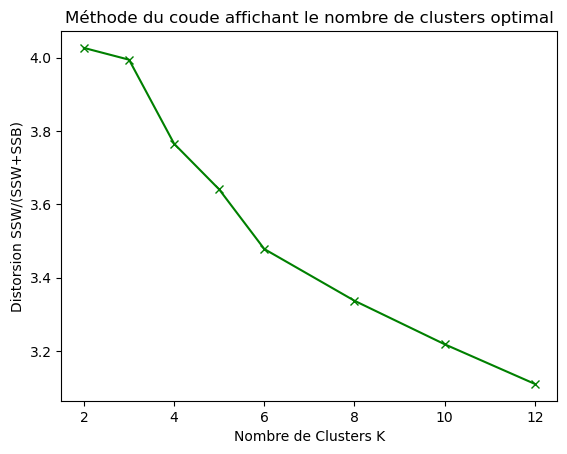

In [59]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Liste des nombres de clusters
range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(df_scaled_df)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(df_scaled_df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df_scaled_df, axis = 0))

# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

On va sélectionner 5 clusters pour future analyse.

**Step 2. Clustering avec KMeans**

In [60]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled_df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Add the cluster labels back to the original DataFrame
df_final_merge2['Cluster'] = labels

# Calculate the mean of each feature for each cluster
cluster_means = df_final_merge2.groupby('Cluster')[features_num_selected].mean().reset_index()

# Display the mean features values by cluster
display(cluster_means)

,Cluster,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,mean_net_salary_hour_overall,mean_net_salary_hour_executives,mean_net_salary_hour_avg_executive,mean_net_salary_hour_employee,mean_net_salary_hour_worker,mean_net_salary_hour_female,mean_net_salary_hour_female_executives,mean_net_salary_hour_avg_female_executive,mean_net_salary_hour_female_employee,mean_net_salary_hour_female_worker,mean_net_salary_hour_male,mean_net_salary_hour_male_executives,mean_net_salary_hour_avg_male_executive,mean_net_salary_hour_male_employee,mean_net_salary_hour_male_worker,mean_net_salary_hour_18_25,mean_net_salary_hour_26_50,mean_net_salary_hour_over_50,mean_net_salary_hour_female_18_25,mean_net_salary_hour_female_26_50,mean_net_salary_hour_female_over_50,mean_net_salary_hour_male_18_25,mean_net_salary_hour_male_26_50,mean_net_salary_hour_male_over_50,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,0,16.734128,0.850075,9.817884,4.616095,1.133532,0.316542,33.635949,100.525815,477.907171,13.844695,23.638242,15.264840,11.181054,11.841628,12.605144,20.851315,14.153137,11.018687,10.542947,14.705905,24.953914,16.141122,11.653670,12.112547,10.331321,13.692036,15.521053,10.062585,12.615860,13.541023,10.517960,14.430299,16.924888,504.373423,160.814845,700.639626,146.994866
1,1,15.172744,0.808129,9.071130,4.167364,0.894202,0.231919,23.572582,66.526019,403.147352,17.197124,26.891163,16.635139,12.158129,12.684109,15.188011,23.361120,15.395639,11.958992,11.222589,18.666526,28.687191,17.707335,12.712415,12.950062,10.837635,16.764230,20.127242,10.454104,15.163470,16.755354,11.123897,17.945080,22.541391,385.921531,340.482673,492.022465,298.017490
2,2,180.092308,11.630769,108.715385,45.423077,11.007692,3.315385,15.723923,69.346462,1147.044615,14.694349,24.814543,15.326014,11.265773,11.378821,13.632615,22.230436,14.551987,11.191559,10.036830,15.447166,26.240075,16.000816,11.437254,11.657837,10.529511,14.562024,17.097791,10.268415,13.744729,15.061128,10.734625,15.113244,18.645853,6156.795488,4592.928208,8072.923039,4165.902929
3,3,19.808411,1.322430,11.845794,4.915888,1.084112,0.640187,14.485888,34.745327,159.624346,25.641456,35.234286,18.852350,13.210916,12.734746,21.158069,29.074354,17.179550,13.045570,11.382372,29.011516,38.829833,20.595042,13.574833,12.949859,12.456065,23.775674,32.193836,11.156853,20.744170,24.411830,13.318278,26.147593,37.648365,506.171823,1705.986731,676.584697,1442.586513
4,4,1921.000000,157.000000,1246.000000,470.000000,45.000000,3.000000,0.000000,0.000000,1.460000,26.902558,36.764664,18.212561,12.738100,11.353863,23.684185,31.407258,17.473785,12.741673,11.046935,29.642383,41.113579,19.090146,12.733468,11.422010,13.089681,25.987506,34.305523,12.805619,23.875711,27.225903,13.395804,27.732365,40.393949,86644.864050,318287.322961,103630.577173,313110.402171


**Cluster 0**
- Un nombre total d'entreprises élevé, indiquant zones avec une forte densité d'activité économique.
- Présence notable d'entreprises de toutes tailles, des auto-entrepreneurs aux grandes entreprises.
- Localisation en périphérie ou dans des zones éloignées des centres urbains, avec une distance moyenne importante par rapport à Paris..
- Salaires horaires moyens compétitifs, particulièrement pour les cadres et les hommes, suggérant une main-d'œuvre qualifiée et des postes à responsabilités élevées.
- Forte disparité entre la population sans diplôme et les diplômés bac+5.

**Cluster 1**
- Zones économiquement dynamiques avec un grand nombre d'entreprises.
- Salaires horaires moyens très élevés, surtout pour les cadres, indiquant des postes de haute qualification..
- Proximité significative avec Paris, indiquant une influence économique de la capitale.
- Forte concentration de diplômés bac+5, suggérant une main-d'œuvre hautement qualifiée.

**Cluster 2**
- Zones caractérisées par un nombre modeste d'entreprises, possiblement des petites villes ou des zones rurales.
- Salaires horaires moyens parmi les plus bas, en particulier pour les cadres, ce qui pourrait indiquer des emplois moins qualifiés ou des industries moins lucratives.
- Éloignement des grands pôles économiques, avec une distance moyenne plus importante par rapport à Paris.
- Faible niveau d'éducation, avec peu de diplômés bac+5.

**Cluster 3**
- Nombre d'entreprises similaire au Cluster 2, mais avec des salaires légèrement plus élevés.
- Distances similaires au Cluster 2 par rapport aux centres administratifs et à Paris.
- Population avec une répartition équilibrée en termes de diplômes, avec une proportion significative de diplômés bac+5.

**Cluster 4**
- Zones avec une activité économique intermédiaire, possiblement des banlieues prospères ou des villes de taille moyenne.
- Salaires horaires moyens élevés, surtout pour les cadres et les femmes, reflétant des postes bien rémunérés.
- Distance réduite par rapport à Paris, suggérant une proximité géographique.
- Fort écart entre les individus sans diplôme et ceux avec un bac+5, montrant une grande diversité dans le niveau d'éducation.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_scaled_df, labels)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for easier viewing
feature_importances_df = pd.DataFrame({
    'Feature': df_scaled_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                                      Feature  Importance
9                mean_net_salary_hour_overall    0.156566
19                  mean_net_salary_hour_male    0.097344
25                 mean_net_salary_hour_26_50    0.095660
14                mean_net_salary_hour_female    0.087436
28          mean_net_salary_hour_female_26_50    0.060919
26               mean_net_salary_hour_over_50    0.060840
31            mean_net_salary_hour_male_26_50    0.057436
12              mean_net_salary_hour_employee    0.046886
17       mean_net_salary_hour_female_employee    0.041304
29        mean_net_salary_hour_female_over_50    0.025043
23           mean_net_salary_hour_male_worker    0.021066
16  mean_net_salary_hour_avg_female_executive    0.020963
0                              Total_Salaries    0.020441
13                mean_net_salary_hour_worker    0.019668
32          mean_net_salary_hour_male_over_50    0.019662
11         mean_net_salary_hour_avg_executive    0.019035
2             

**Step 3. Visualisation des clusters sur la map**

In [62]:
## Map with popup 

import folium
import json
from branca.element import Template, MacroElement

# Define cluster colors and create the base map
cluster_colors = {
    0: '#fbffb8',  # Light Yellow
    1: '#32a852',  # Green
    2: '#fa485a',  # Red
    3: '#cfb8ff',  # Light Purple
    4: '#3530cf'   # Blue
}

m = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

# Function to generate popup text based on cluster number
def generate_popup(dept_name, cluster_num):
    data = cluster_means.loc[cluster_num]
    html = f'''
    <strong>{dept_name} - Cluster {cluster_num}</strong><br>
    Total Salaries: {data['Total_Salaries']}<br>
    Micro Enterprises: {data['nb_micro_entreprises']}<br>
    Mean Salary Overall: {data['mean_net_salary_hour_overall']}<br>
    Mean Salary Male: {data['mean_net_salary_hour_male']}<br>
    Mean Salary Female: {data['mean_net_salary_hour_female']}<br>
    Mean Salary Executives: {data['mean_net_salary_hour_executives']}<br>
    Mean Salary Female Executives: {data['mean_net_salary_hour_female_executives']}<br>
    Mean Salary Male Executives: {data['mean_net_salary_hour_male_executives']}<br>
    ... (add more info here) ...
    '''
    return html

# Load your GeoJSON
geojson_path = '../src/departements.geojson'  # Update this path
with open(geojson_path, 'r') as f:
    geojson_data = json.load(f)

# Iterate through each feature of the GeoJSON and add it to the map
for feature in geojson_data['features']:
    dept_code = feature['properties']['code'] 
    matching_row = df_final_merge2[df_final_merge2['DEPT_code'] == dept_code]
    
    if not matching_row.empty:
        cluster_num = matching_row.iloc[0]['Cluster']  # Extract the cluster number
        dept_name = matching_row.iloc[0]['DEPT_name']  # Extract the department name
        folium.GeoJson(
            feature,
            style_function=lambda x, c=cluster_num: {
                'fillColor': cluster_colors[c],
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            popup=folium.Popup(generate_popup(dept_name,cluster_num), max_width=300)
        ).add_to(m)

# Add a custom legend
legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 160px; 
     border:2px solid grey; z-index:9999; font-size:14px; 
     background:white; padding:10px;">
     <h4 style="margin:8px;">Cluster Legend</h4>
     <div style="background:#fbffb8;width:10px;height:10px;display:inline-block;"></div> Cluster 0 - Yellow<br>
     <div style="background:#32a852;width:10px;height:10px;display:inline-block;"></div> Cluster 1 - Green<br>
     <div style="background:#fa485a;width:10px;height:10px;display:inline-block;"></div> Cluster 2 - Red<br>
     <div style="background:#cfb8ff;width:10px;height:10px;display:inline-block;"></div> Cluster 3 - Purple<br>
     <div style="background:#3530cf;width:10px;height:10px;display:inline-block;"></div> Cluster 4 - Blue
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save('../mnt/departments_clusters_map_popup.html')  # Adjust the save path as needed

#### Section 4.2 K-means Clustering avec ACP  <a class="anchor" id="section_4_2"></a>

**Step 1. Analyse en Composantes Principales**

La variance expliquée :  [1.52737171e+01 7.82448521e+00 2.50714305e+00 2.12974175e+00
 1.35445027e+00 1.19445804e+00 1.08408977e+00 8.07071885e-01
 7.20088651e-01 6.71727755e-01 4.99583174e-01 4.49968714e-01
 4.29177601e-01 3.83739027e-01 3.54715880e-01 2.91607756e-01
 2.44135971e-01 2.15845237e-01 1.61043146e-01 1.22836543e-01
 1.13472102e-01 5.33823462e-02 4.89058766e-02 3.67142274e-02
 6.83378583e-03 6.55744048e-03 4.99928738e-03 4.44259576e-03
 3.63063307e-03 3.00882948e-03 2.58952881e-03 1.33197655e-03
 6.32537357e-04 3.96012126e-04 3.44340493e-04 1.94968289e-05
 5.60319700e-29]


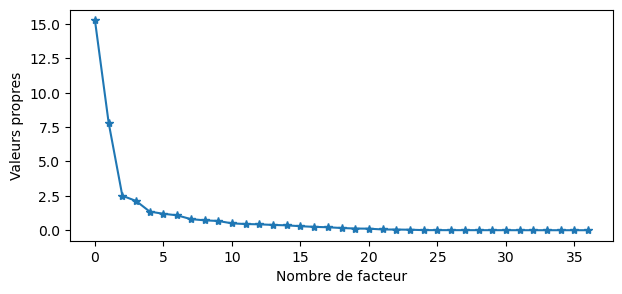

In [63]:
from sklearn.decomposition import PCA

pca = PCA()
Coord = pca.fit_transform(df_scaled_df)
size = len(df_scaled_df.columns)

print("La variance expliquée : ", pca.explained_variance_)

plt.figure(figsize=(7,3))
plt.plot(np.arange(0, size), pca.explained_variance_, marker='*')
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');

La courbe montre que les 2 premières composantes présentent une diminution marquée des valeurs propres, capturant ainsi la majorité de la variance. Nous utiliserons ces cinq composantes pour notre ACP.

Les ration de la variance expliquée : [4.12726336e-01 2.11433215e-01 6.77480115e-02 5.75498748e-02
 3.65999509e-02 3.22766415e-02 2.92942705e-02 2.18086940e-02
 1.94582333e-02 1.81514253e-02 1.34997350e-02 1.21590532e-02
 1.15972358e-02 1.03693948e-02 9.58513140e-03 7.87982388e-03
 6.59704143e-03 5.83256931e-03 4.35170740e-03 3.31928869e-03
 3.06624279e-03 1.44249759e-03 1.32153444e-03 9.92091738e-04
 1.84662539e-04 1.77195136e-04 1.35090728e-04 1.20047809e-04
 9.81069555e-05 8.13045807e-05 6.99742393e-05 3.59926661e-05
 1.70924225e-05 1.07010384e-05 9.30476774e-06 5.26843249e-07
 1.51409572e-30]


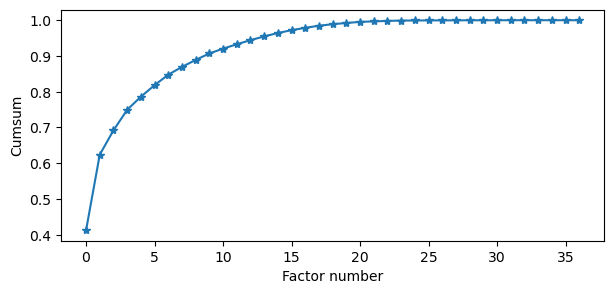

In [64]:
print("Les ration de la variance expliquée :", pca.explained_variance_ratio_)
plt.figure(figsize=(7,3))
plt.plot(np.arange(0,size), np.cumsum(pca.explained_variance_ratio_), marker = '*')
plt.xlabel('Factor number')
plt.ylabel('Cumsum');

Les deux premières composantes expliquent environ 62.42% de la variance totale.

On peut afficher sous forme de camembert la part de variance expliquée par chaque axe de l'ACP.

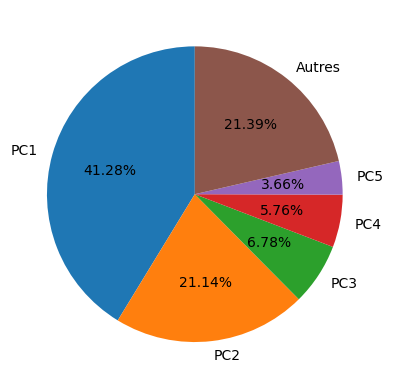

In [65]:
# Camembert de la répartition de la part de variance expliquée par chaque axe.
L1 = list(pca.explained_variance_ratio_[0:5])
L1.append(sum(pca.explained_variance_ratio_[5:31]))

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Autres'], 
        autopct='%1.2f%%', startangle=90);

Ce camembert représente la proportion de variance expliquée par chaque composante principale dans une ACP. Voici la répartition :
- PC1 explique 41.28% de la variance.
- PC2 explique 21.14% de la variance.
- PC3 explique 6.78% de la variance.
- PC4 explique 5.76% de la variance.
- PC5 explique 3.66% de la variance.
- "Autres" expliquent ensemble 21.39% de la variance.

Les 2 premières composantes (PC1 - PC2) combinées expliquent approximativement 62.42% de la variance totale.

**Step 2. Affichage un cercle des corrélations**

On peut à présent tracer le cercle des corrélations, qui nous permet d'évaluer l'influence de chaque variable pour chaque axe de représentation.

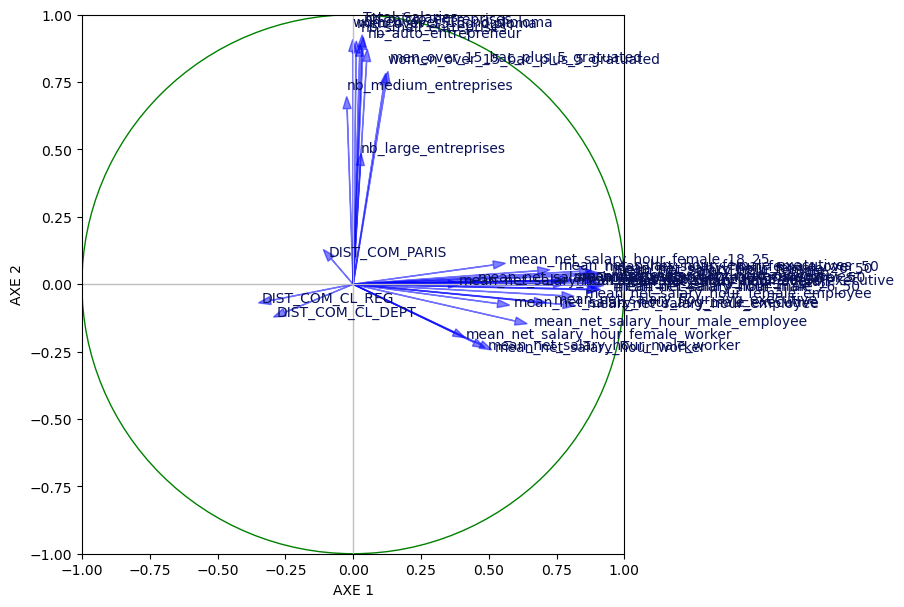

In [66]:
## Static correlation circle 

sqrt_eigval = np.sqrt(pca.explained_variance_)  
corvar = np.zeros((size, size))  

for k in range(size):  # Calculate for the first five components
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

fig, axes = plt.subplots(figsize=(7, 7))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Annotating name of variables
for j in range(size):
    plt.annotate(df_scaled_df.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9, alpha=0.5, head_width=0.03, color='b')

# Add axes lines
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Add a circle to show the correlation coefficient boundary
cercle = plt.Circle((0, 0), 1, color='green', fill=False)
axes.add_artist(cercle)

# Set the labels for the axes
plt.xlabel('AXE 1')  # Principal Component 1
plt.ylabel('AXE 2')  # Principal Component 2

# Display the plot
plt.show()


Les 2 premières composantes (PC1 - PC2) combinées expliquent approximativement 62.42% de la variance totale. Donc on va faire ACP avec n_components = 2, et après réaliser clustering K-Means. 

**Step 3. KMeans clustering apres ACP**

**1. ACP avec n_components = 2**

In [67]:
## Ajusting n_components based on result before for PCA
pca_2 = PCA(n_components = 2)
coord_acp = pca_2.fit_transform(df_scaled_df)

In [68]:
display(pd.DataFrame(coord_acp).head())

,0,1
0,-0.338444,0.693282
1,0.598750,-0.913676
2,-0.038350,0.874674
3,-0.262111,-0.841950
4,-0.176985,-0.918848


**2. Determination le nombre optimal de clusters**

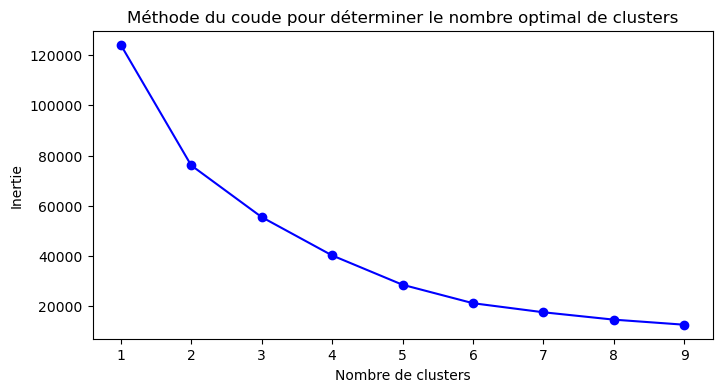

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcul de la distorsion pour un range de nombre de clusters
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coord_acp) # Coord est le résultat d'ACP
    inertias.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()


Sur le graphique, on observe un changement moins marqué dans l'inertie après le troisième cluster, suggérant que choisir 3 clusters pourrait être un bon choix pour votre modèle K-means. 

**3. Application de K-means sur les coordonnées obtenues par l'ACP (coord_acp)**

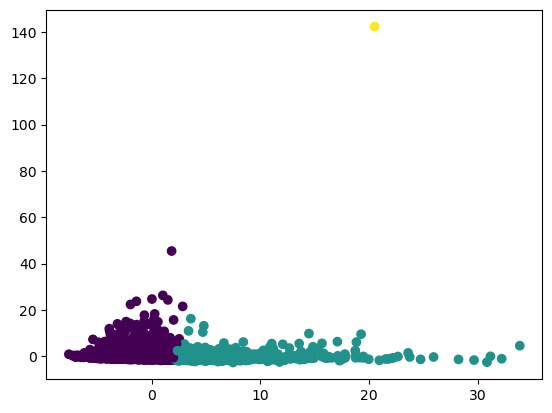

In [70]:
# Application de K-means avec le nombre optimal de clusters sur Coord

k_optimal = 3
kmeans = KMeans(n_clusters = k_optimal, random_state = 42)

kmeans.fit_transform(coord_acp) # coord_acp est le résultat d'ACP

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Ajout des étiquettes de clusters au DataFrame des coordonnées ACP
df_final_merge2['Cluster-ACP'] = labels

kmeans_data = pd.DataFrame({'CP1': coord_acp[:, 0], 'CP2': coord_acp[:, 1], 'Cluster': labels})
plt.scatter(data=kmeans_data, x='CP1', y='CP2', c='Cluster');

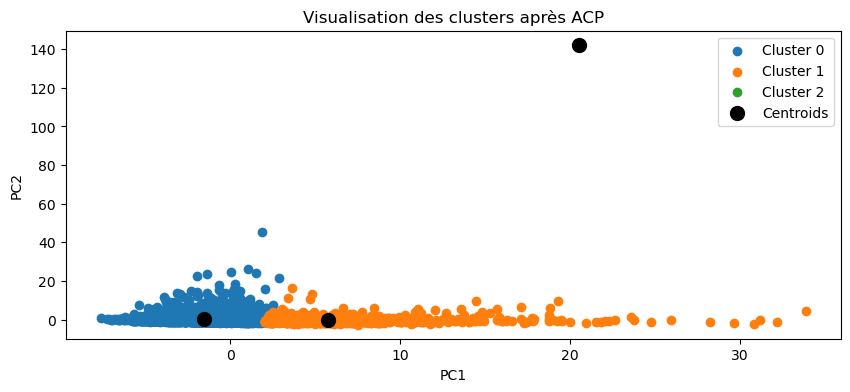

In [71]:
# Visualisation des clusters avec centroids
plt.figure(figsize=(10, 4))

# Scatter plot pour chaque cluster
for i in range(k_optimal):
    plt.scatter(kmeans_data[kmeans_data['Cluster'] == i].iloc[:, 0], kmeans_data[kmeans_data['Cluster'] == i].iloc[:, 1], 
                label=f'Cluster {i}')

# Centres des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=100, c='black', label='Centroids')

plt.xlabel('PC1')  # Première composante principale
plt.ylabel('PC2')  # Deuxième composante principale
plt.title('Visualisation des clusters après ACP')
plt.legend()
plt.show()

In [72]:
# Verification value counts of elements in each cluster
kmeans_data['Cluster'].value_counts()

Cluster
0    4234
1    1138
2       1
Name: count, dtype: int64

Les résultats montrent la répartition des éléments dans trois clusters : le cluster 0 en contient 4234, indiquant un grand groupe principal, le cluster 1 en a 1138, formant un sous-groupe significatif, tandis que le cluster 2 n'a qu'un seul élément, ce qui suggère une caractéristique unique parmi les données.

In [73]:
# Calculate the mean of each feature for each cluster
cluster_means_acp = df_final_merge2.groupby('Cluster-ACP')[features_num_selected].mean().reset_index()
display(cluster_means_acp)

,Cluster-ACP,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,mean_net_salary_hour_overall,mean_net_salary_hour_executives,mean_net_salary_hour_avg_executive,mean_net_salary_hour_employee,mean_net_salary_hour_worker,mean_net_salary_hour_female,mean_net_salary_hour_female_executives,mean_net_salary_hour_avg_female_executive,mean_net_salary_hour_female_employee,mean_net_salary_hour_female_worker,mean_net_salary_hour_male,mean_net_salary_hour_male_executives,mean_net_salary_hour_avg_male_executive,mean_net_salary_hour_male_employee,mean_net_salary_hour_male_worker,mean_net_salary_hour_18_25,mean_net_salary_hour_26_50,mean_net_salary_hour_over_50,mean_net_salary_hour_female_18_25,mean_net_salary_hour_female_26_50,mean_net_salary_hour_female_over_50,mean_net_salary_hour_male_18_25,mean_net_salary_hour_male_26_50,mean_net_salary_hour_male_over_50,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,0,21.301370,1.156117,12.601795,5.757204,1.390175,0.396079,31.674091,95.691393,489.520236,14.243178,24.023363,15.436636,11.301847,11.952223,12.915664,21.168545,14.308441,11.134383,10.623279,15.174633,25.387912,16.334701,11.786936,12.225038,10.395720,14.074577,16.059566,10.115086,12.933303,13.921006,10.593644,14.867608,17.581799,650.564436,305.535999,885.658406,277.278619
1,1,16.685413,0.970123,10.041301,4.428822,0.945518,0.299649,20.493436,52.596942,341.380325,19.606030,29.302572,17.321786,12.559449,12.783782,16.972713,25.064643,16.016626,12.371499,11.343263,21.559411,31.583855,18.544952,13.050882,13.030776,11.258261,18.780873,23.604571,10.672123,16.837572,19.070630,11.678526,20.251867,26.831389,432.367241,683.377612,543.225796,587.024830
2,2,1921.000000,157.000000,1246.000000,470.000000,45.000000,3.000000,0.000000,0.000000,1.460000,26.902558,36.764664,18.212561,12.738100,11.353863,23.684185,31.407258,17.473785,12.741673,11.046935,29.642383,41.113579,19.090146,12.733468,11.422010,13.089681,25.987506,34.305523,12.805619,23.875711,27.225903,13.395804,27.732365,40.393949,86644.864050,318287.322961,103630.577173,313110.402171


In [74]:
## Map with popup 

import folium
import json
from branca.element import Template, MacroElement

# Define cluster colors and create the base map
cluster_colors = {
    0: '#fbffb8',  # Light Yellow
    1: '#32a852',  # Green
    2: '#fa485a',  # Red
}

m = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

# Function to generate popup text based on cluster number
def generate_popup(dept_name, cluster_num):
    data = cluster_means_acp.loc[cluster_num]
    html = f'''
    <strong>{dept_name} - Cluster {cluster_num}</strong><br>
    Total Salaries: {data['Total_Salaries']}<br>
    Micro Enterprises: {data['nb_micro_entreprises']}<br>
    Mean Salary Overall: {data['mean_net_salary_hour_overall']}<br>
    Mean Salary Male: {data['mean_net_salary_hour_male']}<br>
    Mean Salary Female: {data['mean_net_salary_hour_female']}<br>
    Mean Salary Executives: {data['mean_net_salary_hour_executives']}<br>
    Mean Salary Female Executives: {data['mean_net_salary_hour_female_executives']}<br>
    Mean Salary Male Executives: {data['mean_net_salary_hour_male_executives']}<br>
    ... (add more info here) ...
    '''
    return html

# Load your GeoJSON
geojson_path = '../src/departements.geojson'  # Update this path
with open(geojson_path, 'r') as f:
    geojson_data = json.load(f)

# Iterate through each feature of the GeoJSON and add it to the map
for feature in geojson_data['features']:
    dept_code = feature['properties']['code'] 
    matching_row = df_final_merge2[df_final_merge2['DEPT_code'] == dept_code]
    
    if not matching_row.empty:
        cluster_num = matching_row.iloc[0]['Cluster-ACP']  # Extract the cluster number
        dept_name = matching_row.iloc[0]['DEPT_name']  # Extract the department name
        folium.GeoJson(
            feature,
            style_function=lambda x, c=cluster_num: {
                'fillColor': cluster_colors[c],
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            popup=folium.Popup(generate_popup(dept_name,cluster_num), max_width=300)
        ).add_to(m)

# Add a custom legend
legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 160px; 
     border:2px solid grey; z-index:9999; font-size:14px; 
     background:white; padding:10px;">
     <h4 style="margin:8px;">Cluster Legend</h4>
     <div style="background:#fbffb8;width:10px;height:10px;display:inline-block;"></div> Cluster 0 - Yellow<br>
     <div style="background:#32a852;width:10px;height:10px;display:inline-block;"></div> Cluster 1 - Green<br>
     <div style="background:#fa485a;width:10px;height:10px;display:inline-block;"></div> Cluster 2 - Red<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save('../mnt/departments_clusters_ACP.html')  # Adjust the save path as needed

#### Section 4.3 K-means Clustering avec T-SNE  <a class="anchor" id="section_4_3"></a>

**Step 1. Realisation T-SNE** 

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
coord_tsne = tsne.fit_transform(df_scaled_df)

coord_tsne_df = pd.DataFrame(coord_tsne)
coord_tsne_df

#coord_TSNE_df = pd.DataFrame({})

,0,1
0,-2.872378,12.802547
1,31.342901,-19.465401
2,-4.685128,12.315625
3,0.590720,-6.115151
4,1.803535,-20.114622
...,...,...
5368,-8.949609,75.220253
5369,-4.671310,72.133881
5370,-7.154833,74.868271
5371,-9.100732,74.991821


**Step 2. KMeans clustering apres T-SNE**

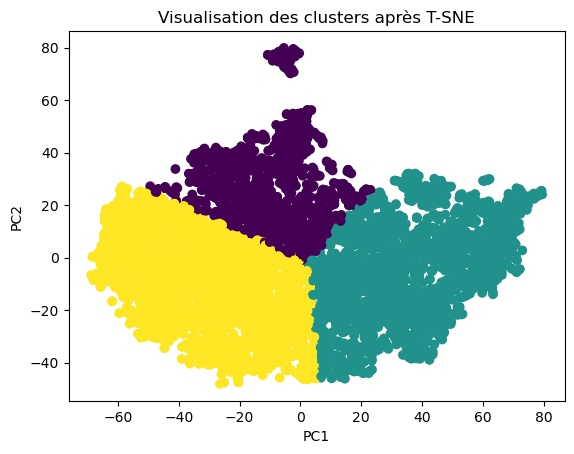

In [76]:
# Application de K-means avec le nombre optimal de clusters sur Coord

k_optimal = 3
kmeans = KMeans(n_clusters = k_optimal, random_state = 42)

kmeans.fit_transform(coord_tsne) # coord_acp est le résultat d'ACP

# Centroids and labels
centroids_tsne  = kmeans.cluster_centers_
labels_tsne = kmeans.labels_

# Ajout des étiquettes de clusters au DataFrame des coordonnées ACP
df_final_merge2['Cluster-TSNE'] = labels

kmeans_data_tsne = pd.DataFrame({'CP1': coord_tsne[:, 0], 'CP2': coord_tsne[:, 1], 'Cluster': labels_tsne})
plt.scatter(data=kmeans_data_tsne, x='CP1', y='CP2', c='Cluster');
plt.xlabel('PC1')  # Première composante principale
plt.ylabel('PC2')  # Deuxième composante principale
plt.title('Visualisation des clusters après T-SNE');

In [77]:
# Verification value counts of elements in each cluster
kmeans_data_tsne['Cluster'].value_counts()

Cluster
1    2151
2    2139
0    1083
Name: count, dtype: int64

K-means sur les visualisations des coordonnées ACP (Analyse en Composantes Principales) et t-SNE (t-distributed Stochastic Neighbor Embedding) montre des distributions de clusters différentes.

- Avec l'ACP, les clusters semblent être étirés et moins bien définis, avec un chevauchement significatif entre les groupes, surtout entre les clusters 0 et 1.
- En revanche, avec t-SNE, une méthode non linéaire, les clusters sont bien plus distincts et compactes, indiquant une séparation plus claire.

In [78]:
# Calculate the mean of each feature for each cluster
cluster_means_tsne = df_final_merge2.groupby('Cluster-TSNE')[features_num_selected].mean().reset_index()
display(cluster_means_tsne)

,Cluster-TSNE,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,mean_net_salary_hour_overall,mean_net_salary_hour_executives,mean_net_salary_hour_avg_executive,mean_net_salary_hour_employee,mean_net_salary_hour_worker,mean_net_salary_hour_female,mean_net_salary_hour_female_executives,mean_net_salary_hour_avg_female_executive,mean_net_salary_hour_female_employee,mean_net_salary_hour_female_worker,mean_net_salary_hour_male,mean_net_salary_hour_male_executives,mean_net_salary_hour_avg_male_executive,mean_net_salary_hour_male_employee,mean_net_salary_hour_male_worker,mean_net_salary_hour_18_25,mean_net_salary_hour_26_50,mean_net_salary_hour_over_50,mean_net_salary_hour_female_18_25,mean_net_salary_hour_female_26_50,mean_net_salary_hour_female_over_50,mean_net_salary_hour_male_18_25,mean_net_salary_hour_male_26_50,mean_net_salary_hour_male_over_50,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated
0,0,21.301370,1.156117,12.601795,5.757204,1.390175,0.396079,31.674091,95.691393,489.520236,14.243178,24.023363,15.436636,11.301847,11.952223,12.915664,21.168545,14.308441,11.134383,10.623279,15.174633,25.387912,16.334701,11.786936,12.225038,10.395720,14.074577,16.059566,10.115086,12.933303,13.921006,10.593644,14.867608,17.581799,650.564436,305.535999,885.658406,277.278619
1,1,16.685413,0.970123,10.041301,4.428822,0.945518,0.299649,20.493436,52.596942,341.380325,19.606030,29.302572,17.321786,12.559449,12.783782,16.972713,25.064643,16.016626,12.371499,11.343263,21.559411,31.583855,18.544952,13.050882,13.030776,11.258261,18.780873,23.604571,10.672123,16.837572,19.070630,11.678526,20.251867,26.831389,432.367241,683.377612,543.225796,587.024830
2,2,1921.000000,157.000000,1246.000000,470.000000,45.000000,3.000000,0.000000,0.000000,1.460000,26.902558,36.764664,18.212561,12.738100,11.353863,23.684185,31.407258,17.473785,12.741673,11.046935,29.642383,41.113579,19.090146,12.733468,11.422010,13.089681,25.987506,34.305523,12.805619,23.875711,27.225903,13.395804,27.732365,40.393949,86644.864050,318287.322961,103630.577173,313110.402171


In [79]:
df_final_merge2

,CODGEO,Total_Salaries,nb_auto_entrepreneur,nb_micro_entreprises,nb_small_entreprises,nb_medium_entreprises,nb_large_entreprises,COM_code_insee,COM_name,COM_latitude,COM_longitude,DEPT,DEPT_code,DEPT_name,DEPT_ChefLieu_Code_insee,DEPT_ChefLieu,DEPT_ChefLieu_latitude,DEPT_ChefLieu_longitude,REG,REG_code,REG_nom,REG_ChefLieu_Code_insee,REG_ChefLieu,REG_ChefLieu_latitude,REG_ChefLieu_longitude,CAP,capital,capital_latitude,capitale_longitude,DIST,DIST_COM_CL_DEPT,DIST_COM_CL_REG,DIST_COM_PARIS,mean_net_salary_hour_overall,mean_net_salary_hour_executives,mean_net_salary_hour_avg_executive,mean_net_salary_hour_employee,mean_net_salary_hour_worker,mean_net_salary_hour_female,mean_net_salary_hour_female_executives,mean_net_salary_hour_avg_female_executive,mean_net_salary_hour_female_employee,mean_net_salary_hour_female_worker,mean_net_salary_hour_male,mean_net_salary_hour_male_executives,mean_net_salary_hour_avg_male_executive,mean_net_salary_hour_male_employee,mean_net_salary_hour_male_worker,mean_net_salary_hour_18_25,mean_net_salary_hour_26_50,mean_net_salary_hour_over_50,mean_net_salary_hour_female_18_25,mean_net_salary_hour_female_26_50,mean_net_salary_hour_female_over_50,mean_net_salary_hour_male_18_25,mean_net_salary_hour_male_26_50,mean_net_salary_hour_male_over_50,men_over_15_no_diploma,men_over_15_bac_plus_5_gratuated,women_over_15_no_diploma,women_over_15_bac_plus_5_gratuated,Cluster,Cluster-ACP,Cluster-TSNE
0,01004,33,2,14,15,2,0,01004,Ambérieu-en-Bugey,45.961049,5.372275,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,28.83,47.15,393.78,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.806580,14.368130,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.130620,19.226540,855.298380,337.430793,1288.509677,394.687094,0,0,0
1,01007,12,0,10,2,0,0,01007,Ambronay,46.005691,5.357749,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,23.79,48.62,389.04,15.261333,24.391671,16.179052,11.917058,12.520221,13.855898,21.532587,15.160246,11.951341,11.462599,16.406488,25.832202,17.070232,11.757341,12.881610,10.544073,15.263487,16.961952,10.618428,14.034526,14.418987,10.487221,16.229187,19.324302,124.959603,70.693462,170.417127,78.663271,1,0,0
2,01014,52,1,29,17,5,0,01014,Arbent,46.283608,5.690756,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,35.33,87.70,379.96,14.578709,27.940065,16.384056,12.175141,11.848787,12.570863,20.702968,13.198429,12.152977,10.930154,16.055836,31.497251,18.083715,12.286341,12.304387,11.058325,14.116861,16.528222,10.295307,12.226430,13.932078,11.623660,15.517659,18.409024,398.364949,44.552301,487.358914,37.977319,0,0,0
3,01024,9,0,6,2,1,0,01024,Attignat,46.286061,5.179818,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,10.33,63.46,355.65,14.658174,23.817275,16.319296,11.905547,12.127913,13.053780,20.157674,14.923592,11.414435,10.282000,15.736794,25.848974,17.122015,13.898011,12.525517,10.498073,14.627982,16.404495,10.031113,13.268833,13.691905,10.812016,15.505663,18.422798,158.498721,58.004641,237.734412,46.394196,0,0,0
4,01025,7,0,5,2,0,0,01025,Bâgé-Dommartin,46.327468,4.966993,||,01,Ain,01053,bourg en bresse,46.205014,5.245594,||,84,Auvergne-Rhône-Alpes,69123,lyon,45.770061,4.828519,||,Paris,48.852937,2.35005,||,25.38,62.89,342.54,14.952910,25.822076,15.365464,11.663794,12.400297,13.444614,22.271103,14.233353,11.410936,11.128622,15.954592,27.519401,16.338719,12.486410,12.666390,10.385396,14.750372,16.854860,10.309374,13.513608,14.336143,10.442608,15.580433,18.421533,287.253552,72.155971,294.886885,81.104008,0,0,0
...,...,...,...,...,...,...,...,...,...,...,..

In [80]:
## Map with popup 

import folium
import json
from branca.element import Template, MacroElement

# Define cluster colors and create the base map
cluster_colors = {
    0: '#fbffb8',  # Light Yellow
    1: '#32a852',  # Green
    2: '#fa485a',  # Red
}

m = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

# Function to generate popup text based on cluster number
def generate_popup(dept_name, cluster_num):
    data = cluster_means_acp.loc[cluster_num]
    html = f'''
    <strong>{dept_name} - Cluster {cluster_num}</strong><br>
    Total Salaries: {data['Total_Salaries']}<br>
    Micro Enterprises: {data['nb_micro_entreprises']}<br>
    Mean Salary Overall: {data['mean_net_salary_hour_overall']}<br>
    Mean Salary Male: {data['mean_net_salary_hour_male']}<br>
    Mean Salary Female: {data['mean_net_salary_hour_female']}<br>
    Mean Salary Executives: {data['mean_net_salary_hour_executives']}<br>
    Mean Salary Female Executives: {data['mean_net_salary_hour_female_executives']}<br>
    Mean Salary Male Executives: {data['mean_net_salary_hour_male_executives']}<br>
    ... (add more info here) ...
    '''
    return html

# Load your GeoJSON
geojson_path = '../src/departements.geojson'  # Update this path
with open(geojson_path, 'r') as f:
    geojson_data = json.load(f)

# Iterate through each feature of the GeoJSON and add it to the map
for feature in geojson_data['features']:
    dept_code = feature['properties']['code'] 
    matching_row = df_final_merge2[df_final_merge2['DEPT_code'] == dept_code]
    
    if not matching_row.empty:
        cluster_num = matching_row.iloc[0]['Cluster-TSNE']  # Extract the cluster number
        dept_name = matching_row.iloc[0]['DEPT_name']  # Extract the department name
        folium.GeoJson(
            feature,
            style_function=lambda x, c=cluster_num: {
                'fillColor': cluster_colors[c],
                'color': 'black',
                'weight': 1,
                'fillOpacity': 0.7
            },
            popup=folium.Popup(generate_popup(dept_name,cluster_num), max_width=300)
        ).add_to(m)

# Add a custom legend
legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 160px; 
     border:2px solid grey; z-index:9999; font-size:14px; 
     background:white; padding:10px;">
     <h4 style="margin:8px;">Cluster Legend</h4>
     <div style="background:#fbffb8;width:10px;height:10px;display:inline-block;"></div> Cluster 0 - Yellow<br>
     <div style="background:#32a852;width:10px;height:10px;display:inline-block;"></div> Cluster 1 - Green<br>
     <div style="background:#fa485a;width:10px;height:10px;display:inline-block;"></div> Cluster 2 - Red<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map
m.save('../mnt/departments_clusters_tsne.html')  # Adjust the save path as needed

### OLD

#### OLD Section 3.3 Calcul des disparités salariales <a class="anchor" id="section_3_3"></a>

#### OLD Section 3.4. Agrégation des données par Régions, Départements <a class="anchor" id="section_3_4"></a>

#### Section 3.5 Normalisation des données avant clustering <a class="anchor" id="section_3_5"></a> 